# Unidad 1 – Fases 1 a 3 (CRISP-DM)

### Proyecto: Análisis y predicción de la deserción de estudiantes en la Universidad Peruana Unión

-Business Understanding → Data Understanding → Data Preparation
-  **Integrantes:** Orihuela Orozco Luis, Ponce Galarza Brayan


## Fase 1. Business Understanding

### 🎯 1. Objective

Desarrollar un modelo predictivo para la deserción estudiantil en la Universidad Peruana Unión, utilizando datos generados artificialmente como base.

## Fase 2. Data Understanding

### 📥 2. Data collection 

In [11]:
import pandas as pd
import numpy as np

'''
df_p1 = pd.read_csv("in_data_cruda_p1_27072025.csv", 
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=';',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice
'''
df = pd.read_excel("upeu_data_desercion.xlsx")


In [12]:
# Eliminar columnas que no aportan
df = df.drop(columns=['Nombres Completos'])
# Resumen general
df.info()
print('df.columns:',df.columns)
print('df.shape:',df.shape)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Género                                                                                                                    5000 non-null   object 
 1   Modo de solicitud                                                                                                         5000 non-null   object 
 2   Orden de solicitud                                                                                                        5000 non-null   object 
 3   Facultad                                                                                                                  5000 non-nu

,Género,Modo de solicitud,Orden de solicitud,Facultad,Trasladado(a),Necesidades educativas especiales,Procedencia,Vivienda,Crianza Adventista,Estado civil,...,"¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?","¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?","¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?,"¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?","¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?"
0,M,Ingreso directo,Segunda Opción,Teología,Sí,No,Provincia,Residencia,No,Soltero,...,5,2,3,5,2,3,3,4,4,2
1,H,Examen de admisión ordinario,Segunda Opción,Ciencias de la Salud,No,No,Lima,Alquila cuarto,Sí,Soltero,...,5,3,2,1,1,5,2,3,5,5
2,H,Examen de admisión ordinario,Primera Opción,Ciencias Humanas y Educación,No,No,Lima,Familiares,Sí,Soltero,...,2,1,3,3,4,5,5,1,5,3
3,H,Ingreso directo,Primera Opción,Ciencias Empresariales,No,No,Provincia,Familiares,Sí,Soltero,...,4,3,1,2,2,4,3,1,4,1
4,H,Examen de admisión ordinario,Primera Opción,Ciencias Humanas y Educación,No,No,Lima,Residencia,Sí,Soltero,...,5,5,1,3,2,2,4,5,5,3
5,M,Examen de admisión ordinario,Tercera Opción,Ciencias Empresariales,No,No,Lima,Familiares,Sí,Soltero,...,3,1,4,1,3,2,5,1,1,1
6,M,Examen de admisión ordinario,Segunda Opción,Ciencias Empresariales,No,No,Provincia,Residencia,Sí,Soltero,...,2,1,1,3,5,2,4,3,5,4
7,H,Ingreso por reingreso,Segunda Opción,Ciencias de la Salud,No,Sí,Lima,Familiares,Sí,Soltero,...,1,1,1,5,1,2,2,1,3,2
8,M,Ingreso directo,Primera Opción,Ciencias de la Salud,No,No,Lima,Residencia,Sí,Soltero,...,3,1,5,2,5,1,5,1,4,5
9,M,Ingreso por convenio o beca especial,Tercera Opción,Ciencias Empresariales,No,No,Lima,Residencia,Sí,Soltero,...,3,4,4,3,1,4,5,4,2,1


### 📊 3. Descriptive analysis

#### 3.1 Análisis descriptivo

In [13]:
#Resumen estadístico de todas las variables (describe()).
df.describe(include="all").T # incluye categóricas y numéricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Género,5000,2,M,2750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modo de solicitud,5000,6,Examen de admisión ordinario,3008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orden de solicitud,5000,3,Primera Opción,3458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Facultad,5000,5,Ciencias Empresariales,1479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trasladado(a),5000,2,No,4494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Necesidades educativas especiales,5000,2,No,4862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Procedencia,5000,3,Lima,2729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vivienda,5000,3,Familiares,2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crianza Adventista,5000,2,Sí,3231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estado civil,5000,2,Soltero,4752,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Separar los datos segú sus Tipos de variables (numéricas, categóricas). fechas se considera como cat aunque también puedes separr
numeric_data = df.select_dtypes(include=[np.number])
categor_data = df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 22 numeric and 19 categorical columns in train data


In [15]:
numeric_data.describe().T
# Puedes ver la Distribución de variables numéricas (cantidad o freq, media, mediana, desviación estándar, mín, máx. etc.).

,count,mean,std,min,25%,50%,75%,max
Descuento,5000.0,498.158632,346.624256,5.51,244.1675,415.49,671.2800,2537.31
Deuda,5000.0,960.131896,885.856249,0.87,331.0125,712.79,1291.5225,8000.00
Edad,5000.0,21.595400,3.072065,16.00,19.0000,22.00,24.0000,33.00
Unidades curriculares 1.º semestre (matriculadas),5000.0,5.999200,1.410389,4.00,5.0000,6.00,7.0000,8.00
Unidades curriculares 1.º semestre (evaluadas),5000.0,5.502000,1.513953,3.00,4.0000,5.00,7.0000,8.00
Unidades curriculares 1.º semestre (aprobadas),5000.0,3.511800,1.331546,1.00,3.0000,3.00,4.0000,8.00
Desarrollo de Tareas (%),5000.0,79.186820,10.126950,38.30,72.5000,79.30,86.1250,100.00
Asistencia (%),5000.0,84.553320,8.251159,50.60,79.0000,84.70,90.5000,100.00
Promedio ponderado del semestre,5000.0,12.746932,2.990212,5.00,10.7100,12.76,14.8000,20.00
¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?,5000.0,2.976800,1.502902,1.00,2.0000,3.00,4.0000,5.00


In [16]:
categor_data.describe(include="all").T
# Puedes ver valores únicos en categóricas (ej. State, Vehicle type, Fuel type), freq, etc.

,count,unique,top,freq
Género,5000,2,M,2750
Modo de solicitud,5000,6,Examen de admisión ordinario,3008
Orden de solicitud,5000,3,Primera Opción,3458
Facultad,5000,5,Ciencias Empresariales,1479
Trasladado(a),5000,2,No,4494
Necesidades educativas especiales,5000,2,No,4862
Procedencia,5000,3,Lima,2729
Vivienda,5000,3,Familiares,2471
Crianza Adventista,5000,2,Sí,3231
Estado civil,5000,2,Soltero,4752


In [17]:
# Columnas categóricas a explorar
categorical_cols = [
    'Género','Modo de solicitud','Orden de solicitud','Facultad',
    'Trasladado(a)','Necesidades educativas especiales','Procedencia',
    'Vivienda','Crianza Adventista','Estado civil','Titulación de la madre',
    'Titulación del padre','Ocupación de la madre','Ocupación del padre',
    'Formas de Pago','Matrícula al día','Becario','Situación laboral','Condición Final'
]

# Conteo de valores únicos en categóricas
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts())

# Conteo de la variable objetivo
print("\nCondición Final:\n", df["Condición Final"].value_counts())


Género:
 Género
M    2750
H    2250
Name: count, dtype: int64

Modo de solicitud:
 Modo de solicitud
Examen de admisión ordinario            3008
Ingreso directo                         1001
Ingreso por convenio o beca especial     356
Ingreso por traslado externo             230
Ingreso por traslado interno             210
Ingreso por reingreso                    195
Name: count, dtype: int64

Orden de solicitud:
 Orden de solicitud
Primera Opción    3458
Segunda Opción    1171
Tercera Opción     371
Name: count, dtype: int64

Facultad:
 Facultad
Ciencias Empresariales          1479
Ingeniería y Arquitectura       1384
Ciencias de la Salud            1017
Ciencias Humanas y Educación     931
Teología                         189
Name: count, dtype: int64

Trasladado(a):
 Trasladado(a)
No    4494
Sí     506
Name: count, dtype: int64

Necesidades educativas especiales:
 Necesidades educativas especiales
No    4862
Sí     138
Name: count, dtype: int64

Procedencia:
 Procedencia
Lima     

#### 3.2 Análisis descriptivo (gráficos)

In [18]:
import numpy as np
import pandas as pd

# 1) Derivadas clave
df["tasa_aprobacion"]  = (df["Unidades curriculares 1.º semestre (aprobadas)"] 
                          / df["Unidades curriculares 1.º semestre (evaluadas)"]).replace([np.inf, -np.inf], np.nan)
df["tasa_evaluacion"]  = (df["Unidades curriculares 1.º semestre (evaluadas)"] 
                          / df["Unidades curriculares 1.º semestre (matriculadas)"])
df["carga_aprobada"]   = (df["Unidades curriculares 1.º semestre (aprobadas)"] 
                          / df["Unidades curriculares 1.º semestre (matriculadas)"])
df["deuda_neta"]       = df["Deuda"] - df["Descuento"]
df["morosidad"]        = (df["Matrícula al día"] == "No").astype(int)

likert_cols = [c for c in df.columns if c.strip().startswith("¿")]
df["likert_riesgo_prom"] = df[likert_cols].mean(axis=1)

map_orden = {"Primera Opción":0,"Segunda Opción":1,"Tercera Opción":2}
df["orden_prioridad"] = df["Orden de solicitud"].map(map_orden)

map_lab = {"No Trabaja":0,"Medio Tiempo":1,"Tiempo completo":2}
df["trabajo_ordinal"] = df["Situación laboral"].map(map_lab)

df["backlog_eval"] = df["Unidades curriculares 1.º semestre (matriculadas)"] - df["Unidades curriculares 1.º semestre (evaluadas)"]
df["backlog_aprob"] = df["Unidades curriculares 1.º semestre (evaluadas)"] - df["Unidades curriculares 1.º semestre (aprobadas)"]

# Bandas útiles
df["asistencia_banda"] = pd.cut(df["Asistencia (%)"], bins=[0,75,85,95,100], labels=["<75","75-85","85-95","95-100"])
df["deuda_banda"] = pd.cut(df["deuda_neta"], bins=[-np.inf,0,500,1500,3000,np.inf], 
                           labels=["<=0","0-500","500-1500","1500-3000",">3000"])


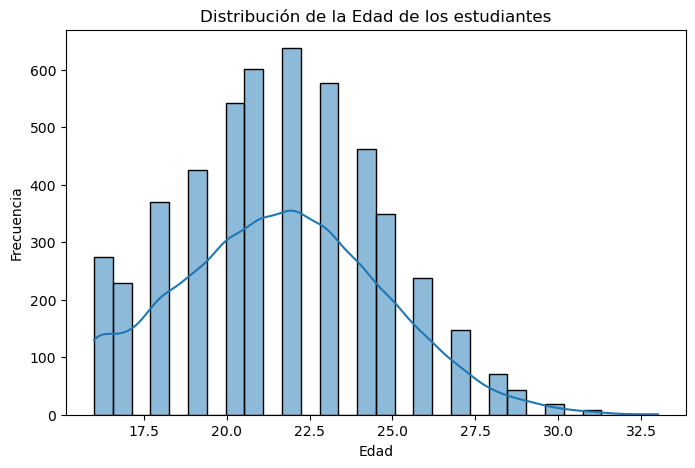

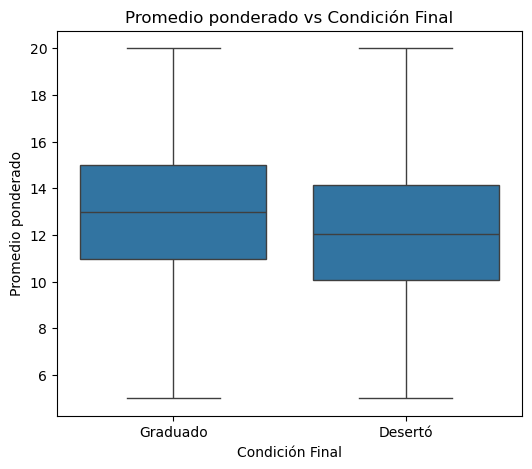

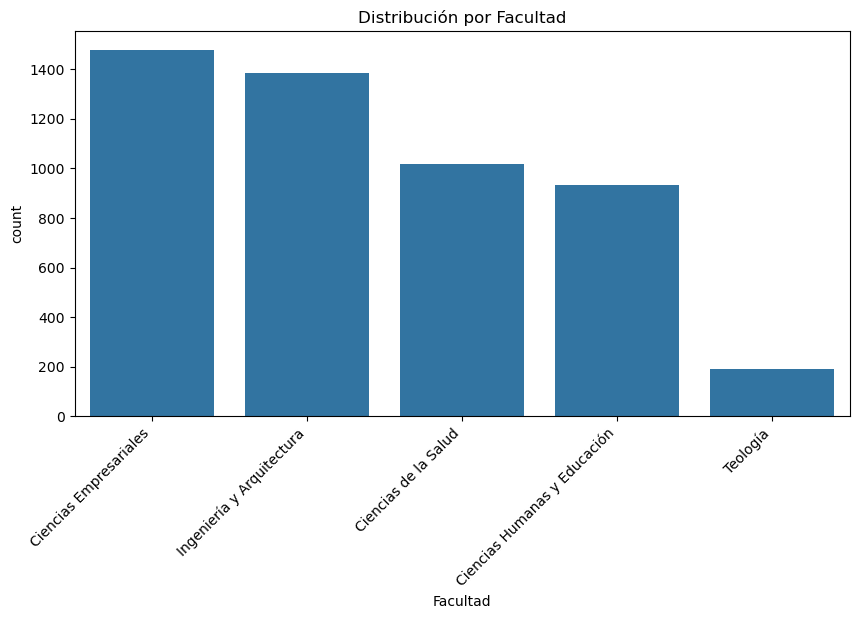

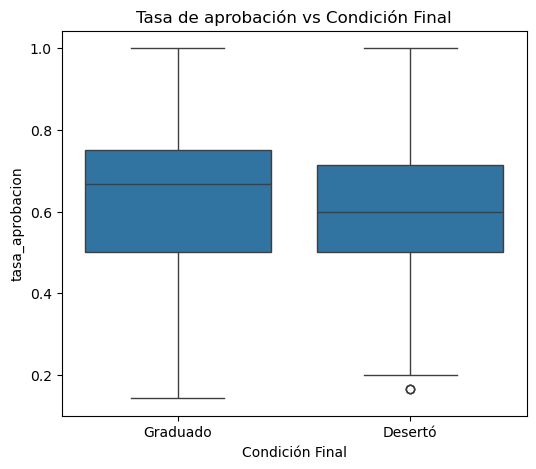

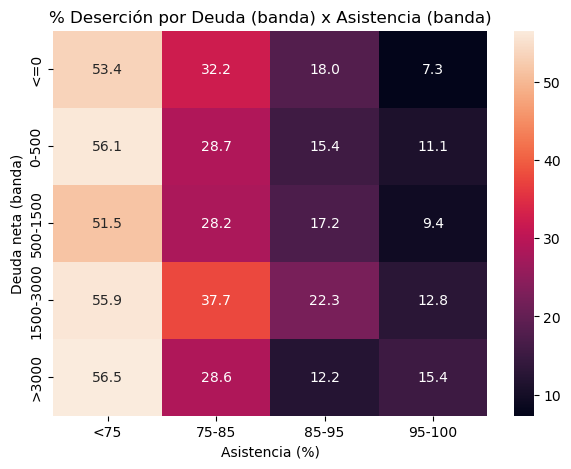

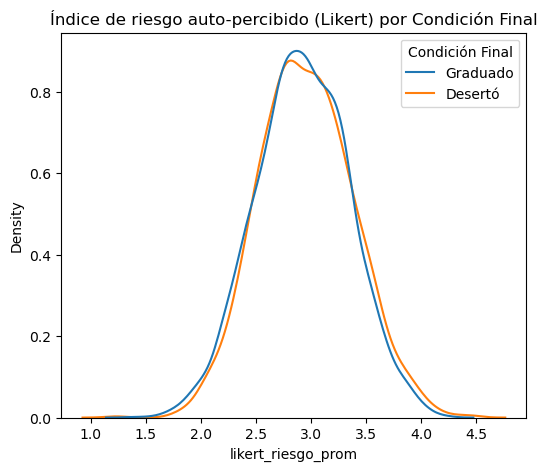

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de Edad de los estudiantes
plt.figure(figsize=(8,5))
sns.histplot(df['Edad'], bins=30, kde=True)
plt.title("Distribución de la Edad de los estudiantes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de promedio ponderado por Condición Final
plt.figure(figsize=(6,5))
sns.boxplot(x='Condición Final', y='Promedio ponderado del semestre', data=df)
plt.title("Promedio ponderado vs Condición Final")
plt.xlabel("Condición Final")
plt.ylabel("Promedio ponderado")
plt.show()

# Conteo de facultad
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Facultad', order=df['Facultad'].value_counts().index)
plt.title("Distribución por Facultad")
plt.xticks(rotation=45, ha="right")
plt.show()

# Boxplot: tasa_aprobacion vs Condición Final
plt.figure(figsize=(6,5))
sns.boxplot(x="Condición Final", y="tasa_aprobacion", data=df)
plt.title("Tasa de aprobación vs Condición Final")
plt.show()

# Heatmap: deserción por bandas de deuda y asistencia
tabla = pd.crosstab(df["deuda_banda"], df["asistencia_banda"], 
                    values=(df["Condición Final"]=="Desertó").astype(int), aggfunc="mean")
plt.figure(figsize=(7,5))
sns.heatmap(tabla*100, annot=True, fmt=".1f")
plt.title("% Deserción por Deuda (banda) x Asistencia (banda)")
plt.xlabel("Asistencia (%)"); plt.ylabel("Deuda neta (banda)")
plt.show()

# Relación Likert compuesto vs Condición Final
plt.figure(figsize=(6,5))
sns.kdeplot(data=df, x="likert_riesgo_prom", hue="Condición Final", common_norm=False)
plt.title("Índice de riesgo auto-percibido (Likert) por Condición Final")
plt.show()


#### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

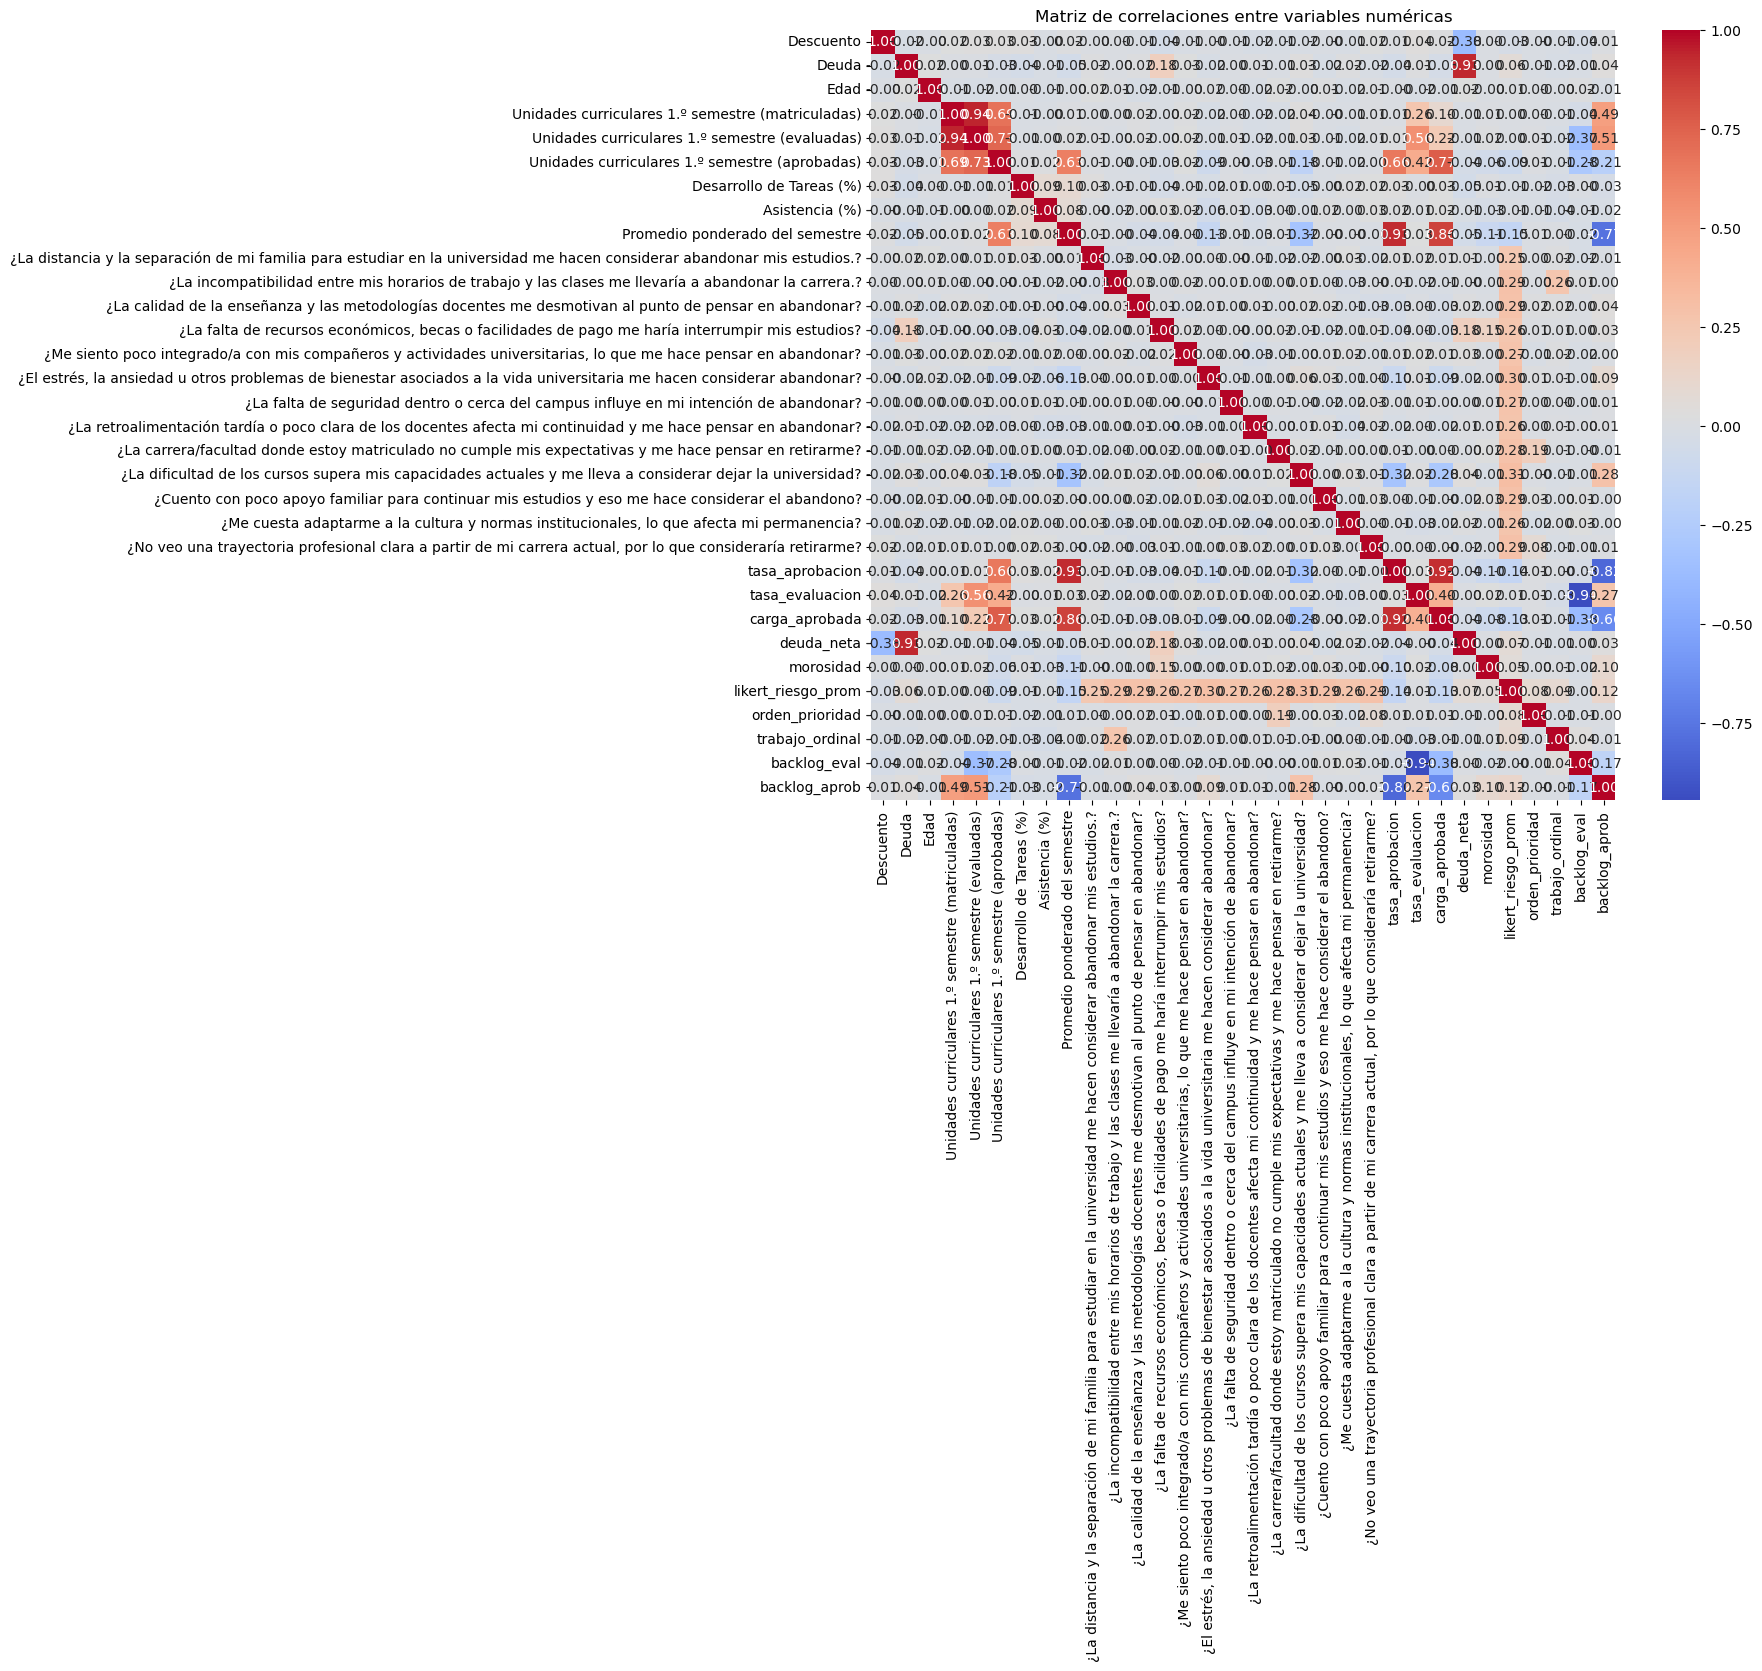


Distribución porcentual de Condición Final por Género:

Condición Final    Desertó   Graduado
Género                               
H                26.800000  73.200000
M                26.109091  73.890909

Distribución porcentual de Condición Final por Situación laboral:

Condición Final      Desertó   Graduado
Situación laboral                      
Medio Tiempo       28.248175  71.751825
No Trabaja         24.390244  75.609756
Tiempo completo    30.461923  69.538077

Distribución porcentual de Condición Final por Carrera:

Condición Final                 Desertó   Graduado
Facultad                                          
Ciencias Empresariales        29.141312  70.858688
Ciencias Humanas y Educación  28.141783  71.858217
Ciencias de la Salud          13.569322  86.430678
Ingeniería y Arquitectura     32.658960  67.341040
Teología                      20.105820  79.894180

% Deserción — Situación laboral × Asistencia:
 asistencia_banda    <75  75-85  85-95  95-100
Situación labo

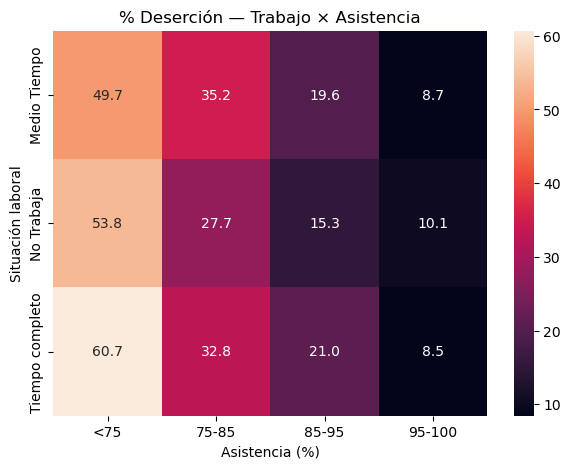


% Deserción — Matrícula al día × Deuda (bandas):
 deuda_banda        <=0  0-500  500-1500  1500-3000  >3000
Matrícula al día                                         
No                43.3   38.3      34.8       35.5   54.5
Sí                24.8   23.1      23.9       31.0   24.1


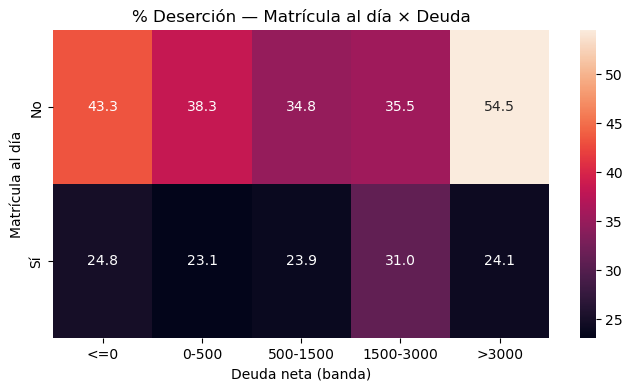


% Deserción — Becario × Deuda (bandas):
 deuda_banda   <=0  0-500  500-1500  1500-3000  >3000
Becario                                             
No           28.9   25.2      25.9       33.1   27.4
Sí           19.9   22.4      16.9       17.8   23.1


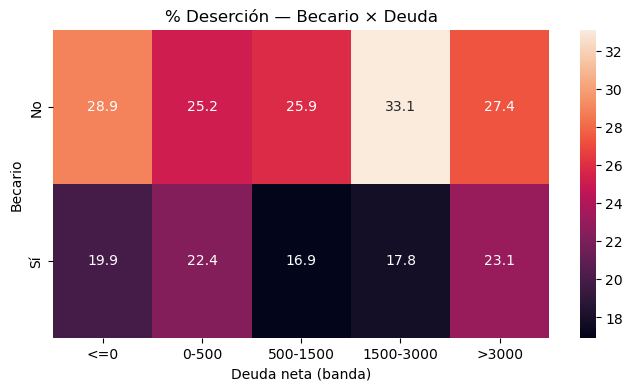


% Deserción — Asistencia (bandas) × Tareas (bandas):
 tareas_banda       <60  60-75  75-85  85-95  95-100
asistencia_banda                                   
<75               77.4   63.7   55.2   34.6    22.2
75-85             63.8   40.3   28.5   20.9     8.4
85-95             47.3   27.4   15.3    7.9     6.6
95-100            26.3   15.8    8.1    4.4     4.3


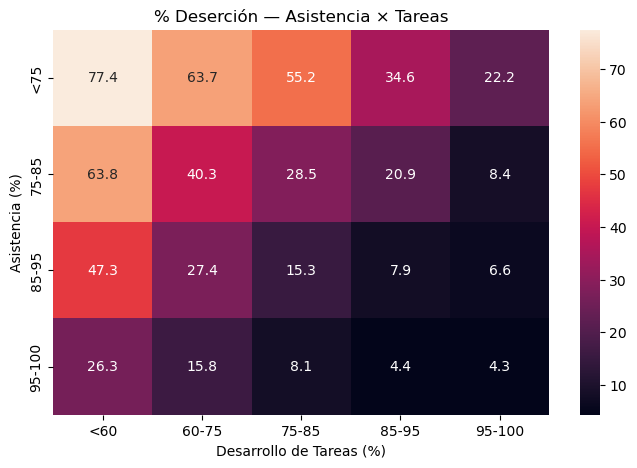


% Deserción — Orden de solicitud × Facultad:
 Facultad            Ciencias Empresariales  Ciencias Humanas y Educación  \
Orden de solicitud                                                         
Primera Opción                        28.3                          29.6   
Segunda Opción                        31.8                          25.6   
Tercera Opción                        28.1                          21.7   

Facultad            Ciencias de la Salud  Ingeniería y Arquitectura  Teología  
Orden de solicitud                                                             
Primera Opción                      13.0                       31.9      19.9  
Segunda Opción                      14.5                       33.9      25.0  
Tercera Opción                      16.4                       35.8      11.8  


In [21]:
# 1. Correlaciones numéricas (rendimiento académico, edad, asistencia, etc.)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones entre variables numéricas")
plt.show()

if "asistencia_banda" not in df.columns:
    df["asistencia_banda"] = pd.cut(df["Asistencia (%)"],
                                    bins=[0,75,85,95,100],
                                    labels=["<75","75-85","85-95","95-100"])
if "deuda_neta" not in df.columns:
    df["deuda_neta"] = df["Deuda"] - df["Descuento"]
if "deuda_banda" not in df.columns:
    df["deuda_banda"] = pd.cut(df["deuda_neta"],
                               bins=[-np.inf,0,500,1500,3000,np.inf],
                               labels=["<=0","0-500","500-1500","1500-3000",">3000"])
if "tasa_aprobacion" not in df.columns:
    df["tasa_aprobacion"] = (df["Unidades curriculares 1.º semestre (aprobadas)"] /
                             df["Unidades curriculares 1.º semestre (evaluadas)"]).replace([np.inf,-np.inf], np.nan)
if "tareas_banda" not in df.columns:
    df["tareas_banda"] = pd.cut(df["Desarrollo de Tareas (%)"],
                                bins=[0,60,75,85,95,100],
                                labels=["<60","60-75","75-85","85-95","95-100"])

target_bin = (df["Condición Final"]=="Desertó").astype(int)


# 2. Cruce de variables categóricas con la variable objetivo (Condición Final)
# Ejemplo: Género vs Condición Final
cruce_genero = pd.crosstab(df['Género'], df['Condición Final'], normalize='index') * 100
print("\nDistribución porcentual de Condición Final por Género:\n")
print(cruce_genero)

# Otro ejemplo: Situación laboral vs Condición Final
cruce_trabajo = pd.crosstab(df['Situación laboral'], df['Condición Final'], normalize='index') * 100
print("\nDistribución porcentual de Condición Final por Situación laboral:\n")
print(cruce_trabajo)

# Otro ejemplo: Carrera vs Condición Final (puede ser más grande)
cruce_carrera = pd.crosstab(df['Facultad'], df['Condición Final'], normalize='index') * 100
print("\nDistribución porcentual de Condición Final por Carrera:\n")
print(cruce_carrera.head())  # solo mostramos las primeras filas para no saturar

# Situación laboral × Asistencia (bandas) ===
tab1 = pd.crosstab(df["Situación laboral"], df["asistencia_banda"], values=target_bin, aggfunc="mean")
print("\n% Deserción — Situación laboral × Asistencia:\n", (tab1*100).round(1))

plt.figure(figsize=(7,5))
sns.heatmap(tab1*100, annot=True, fmt=".1f")
plt.title("% Deserción — Trabajo × Asistencia"); plt.xlabel("Asistencia (%)"); plt.ylabel("Situación laboral")
plt.show()

#  Matrícula al día × Deuda (bandas) ===
tab2 = pd.crosstab(df["Matrícula al día"], df["deuda_banda"], values=target_bin, aggfunc="mean")
print("\n% Deserción — Matrícula al día × Deuda (bandas):\n", (tab2*100).round(1))

plt.figure(figsize=(8,4))
sns.heatmap(tab2*100, annot=True, fmt=".1f")
plt.title("% Deserción — Matrícula al día × Deuda"); plt.xlabel("Deuda neta (banda)"); plt.ylabel("Matrícula al día")
plt.show()

# Becario × Deuda (bandas) ===
tab3 = pd.crosstab(df["Becario"], df["deuda_banda"], values=target_bin, aggfunc="mean")
print("\n% Deserción — Becario × Deuda (bandas):\n", (tab3*100).round(1))

plt.figure(figsize=(8,4))
sns.heatmap(tab3*100, annot=True, fmt=".1f")
plt.title("% Deserción — Becario × Deuda"); plt.xlabel("Deuda neta (banda)"); plt.ylabel("Becario")
plt.show()

# Asistencia (bandas) × Desarrollo de Tareas (bandas) ===
tab4 = pd.crosstab(df["asistencia_banda"], df["tareas_banda"], values=target_bin, aggfunc="mean")
print("\n% Deserción — Asistencia (bandas) × Tareas (bandas):\n", (tab4*100).round(1))

plt.figure(figsize=(8,5))
sns.heatmap(tab4*100, annot=True, fmt=".1f")
plt.title("% Deserción — Asistencia × Tareas"); plt.xlabel("Desarrollo de Tareas (%)"); plt.ylabel("Asistencia (%)")
plt.show()

# === (Opcional muy útil) Orden de solicitud × Facultad ===
tab5 = pd.crosstab(df["Orden de solicitud"], df["Facultad"], values=target_bin, aggfunc="mean")
print("\n% Deserción — Orden de solicitud × Facultad:\n", (tab5*100).round(1))


#### 3.4 Diagnóstico de calidad inicial 


Valores faltantes por columna:

Género                                                                                                                      0
Modo de solicitud                                                                                                           0
Orden de solicitud                                                                                                          0
Facultad                                                                                                                    0
Trasladado(a)                                                                                                               0
Necesidades educativas especiales                                                                                           0
Procedencia                                                                                                                 0
Vivienda                                                                             

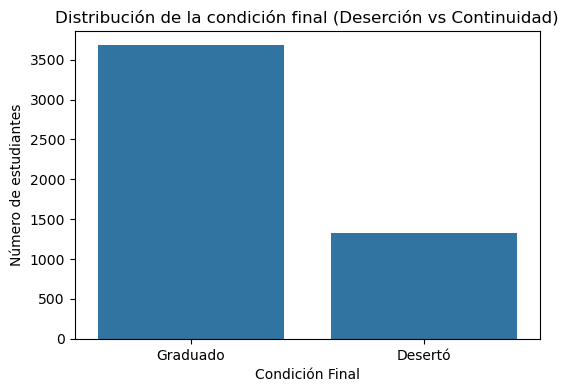


Duplicados exactos de filas: 0

Valores fuera de dominio por columna (si hay):

Resultados de reglas de consistencia:
- asistencia_0_100: True
- tareas_0_100: True
- promedio_5_20: True
- uc_eval_le_mat: True
- uc_aprob_le_eval: True
- descuento_deuda_no_neg: True

Casos con evaluadas==0 y aprobadas>0: 0

Ítems Likert con valores fuera de 1–5 (si hay): OK

Outliers (conteo; rango IQR aceptable):
- Deuda: 245 outliers; rango≈(-1109.75, 2732.29)
- Descuento: 156 outliers; rango≈(-396.5, 1311.95)
- Edad: 2 outliers; rango≈(11.5, 31.5)
- Asistencia (%): 22 outliers; rango≈(61.75, 107.75)
- Desarrollo de Tareas (%): 16 outliers; rango≈(52.06, 106.56)
- Promedio ponderado del semestre: 0 outliers; rango≈(4.58, 20.94)

% Deserción por Facultad:
Facultad
Ingeniería y Arquitectura       32.7
Ciencias Empresariales          29.1
Ciencias Humanas y Educación    28.1
Teología                        20.1
Ciencias de la Salud            13.6
Name: drop, dtype: float64


In [22]:
# --- 1. Valores faltantes ---
print("\nValores faltantes por columna:\n")
print(df.isnull().sum())

# --- 2. Posibles inconsistencias ---
# Edad
print("\nEdad mínima y máxima:")
print("Mínimo:", df['Edad'].min())
print("Máximo:", df['Edad'].max())

# Promedio ponderado
print("\nPromedio ponderado mínimo y máximo:")
print("Mínimo:", df['Promedio ponderado del semestre'].min())
print("Máximo:", df['Promedio ponderado del semestre'].max())

# Nota: aquí puedes revisar si hay edades imposibles (ej. 5 años o 90 años) o promedios fuera de rango (ej. >20 en escala peruana).

# --- 3. Distribución de la variable objetivo ---
plt.figure(figsize=(6,4))
sns.countplot(x='Condición Final', data=df, order=df['Condición Final'].value_counts().index)
plt.title("Distribución de la condición final (Deserción vs Continuidad)")
plt.xlabel("Condición Final")
plt.ylabel("Número de estudiantes")
plt.show()

# --- 4. Duplicados exactos ---
dup_count = df.duplicated().sum()
print(f"\nDuplicados exactos de filas: {dup_count}")

# --- 5. Validación de dominios categóricos (valores inesperados) ---
expected = {
    "Género": {"H","M"},
    "Modo de solicitud": {"Examen de admisión ordinario","Ingreso por traslado externo","Ingreso por traslado interno",
                          "Ingreso por convenio o beca especial","Ingreso directo","Ingreso por reingreso"},
    "Orden de solicitud": {"Primera Opción","Segunda Opción","Tercera Opción"},
    "Facultad": {"Ciencias Empresariales","Ciencias Humanas y Educación","Ingeniería y Arquitectura","Ciencias de la Salud","Teología"},
    "Trasladado(a)": {"Sí","No"},
    "Necesidades educativas especiales": {"Sí","No"},
    "Procedencia": {"Lima","Provincia","Extranjero"},
    "Vivienda": {"Residencia","Familiares","Alquila cuarto"},
    "Crianza Adventista": {"Sí","No"},
    "Estado civil": {"Soltero","Casado"},
    "Formas de Pago": {"Armadas","Contado","Otros"},
    "Matrícula al día": {"Sí","No"},
    "Becario": {"Sí","No"},
    "Situación laboral": {"No Trabaja","Medio Tiempo","Tiempo completo"},
}
print("\nValores fuera de dominio por columna (si hay):")
for col, dom in expected.items():
    if col in df.columns:
        ood = set(df[col].dropna().unique()) - dom
        if ood:
            print(f"- {col}: {ood}")

# --- 6. Reglas de consistencia entre columnas ---
import numpy as np
rules = {
    "asistencia_0_100": df["Asistencia (%)"].between(0,100).all(),
    "tareas_0_100": df["Desarrollo de Tareas (%)"].between(0,100).all(),
    "promedio_5_20": df["Promedio ponderado del semestre"].between(0,20).all(),  # ajusta si usas otra escala
    "uc_eval_le_mat": (df["Unidades curriculares 1.º semestre (evaluadas)"] 
                       <= df["Unidades curriculares 1.º semestre (matriculadas)"]).all(),
    "uc_aprob_le_eval": (df["Unidades curriculares 1.º semestre (aprobadas)"] 
                         <= df["Unidades curriculares 1.º semestre (evaluadas)"]).all(),
    "descuento_deuda_no_neg": (df["Descuento"].ge(0).all() and df["Deuda"].ge(0).all()),
}
print("\nResultados de reglas de consistencia:")
for k,v in rules.items():
    print(f"- {k}: {v}")

# Casos puntuales sospechosos
mask_eval_0_aprob_pos = (df["Unidades curriculares 1.º semestre (evaluadas)"]==0) & (df["Unidades curriculares 1.º semestre (aprobadas)"]>0)
print("\nCasos con evaluadas==0 y aprobadas>0:", int(mask_eval_0_aprob_pos.sum()))

# --- 7. Integridad de ítems Likert (1–5) ---
likert_cols = [c for c in df.columns if c.strip().startswith("¿")]
viol = {}
for c in likert_cols:
    bad = ~df[c].isin([1,2,3,4,5])
    if bad.any():
        viol[c] = int(bad.sum())
print("\nÍtems Likert con valores fuera de 1–5 (si hay):", viol if viol else "OK")

# --- 8. Outliers simples (IQR) en métricas clave ---
def iqr_outliers(s):
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    return int((s < lo).sum() + (s > hi).sum()), (lo, hi)

num_check = ["Deuda","Descuento","Edad","Asistencia (%)","Desarrollo de Tareas (%)","Promedio ponderado del semestre"]
print("\nOutliers (conteo; rango IQR aceptable):")
for c in num_check:
    n_out, rng = iqr_outliers(df[c].astype(float))
    print(f"- {c}: {n_out} outliers; rango≈{tuple(round(x,2) for x in rng)}")

# --- 9. Balance de clase por Facultad (útil para segmentar) ---
dist_fac = (df.assign(drop=(df["Condición Final"]=="Desertó").astype(int))
              .groupby("Facultad")["drop"].mean().sort_values(ascending=False))
print("\n% Deserción por Facultad:")
print((dist_fac*100).round(1))



In [24]:
# --- 1. Valores faltantes ---
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts/len(df)*100).round(2)
quality_missing = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct})
display(quality_missing)

# --- 2. Duplicados ---
# Usamos Facultad + Año/Semestre (si lo tienes en tu data)
# Si no tienes fecha, dejamos solo ID
if 'ID' in df.columns:
    dup_keys = df.duplicated(subset=['Facultad'], keep=False)
    print('Registros potencialmente duplicados:', dup_keys.sum())
else:
    dup_keys = df.duplicated()
    print('Registros potencialmente duplicados:', dup_keys.sum())

# --- 3. Registros sospechosos ---
# Definimos reglas simples para detectar datos poco realistas
suspects = df[
    (df['Edad'] < 15) | (df['Edad'] > 70) |   # Edades sospechosas
    (df['Promedio ponderado del semestre'] < 0) | 
    (df['Promedio ponderado del semestre'] > 20)  # Notas fuera del rango
]

print("Registros sospechosos detectados:", len(suspects))
if len(suspects) > 0:
    display(suspects[['Edad','Facultad','Promedio ponderado del semestre','Condición Final']].head())


,missing,missing_%
Género,0,0.0
"¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?",0,0.0
¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?,0,0.0
¿La calidad de la enseñanza y las metodologías docentes me desmotivan al punto de pensar en abandonar?,0,0.0
"¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?",0,0.0
"¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?",0,0.0
"¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",0,0.0
¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,0,0.0
¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,0,0.0
¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,0,0.0


Registros potencialmente duplicados: 0
Registros sospechosos detectados: 0


#### 3.5 Perfil estadístico comparativo (Aprobados vs Desaprobados)

In [25]:
# Medias comparativas de variables numéricas según la Condición Final
medias_comparativas = df.groupby('Condición Final').mean(numeric_only=True)
display(medias_comparativas)

,Descuento,Deuda,Edad,Unidades curriculares 1.º semestre (matriculadas),Unidades curriculares 1.º semestre (evaluadas),Unidades curriculares 1.º semestre (aprobadas),Desarrollo de Tareas (%),Asistencia (%),Promedio ponderado del semestre,¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?,...,tasa_aprobacion,tasa_evaluacion,carga_aprobada,deuda_neta,morosidad,likert_riesgo_prom,orden_prioridad,trabajo_ordinal,backlog_eval,backlog_aprob
Condición Final,,,,,,,,,,,,,,,,,,,,,
Desertó,498.808456,996.032392,21.596518,5.983346,5.476911,3.330053,74.906737,80.290386,12.094663,2.983346,...,0.608342,0.910718,0.554349,497.223936,0.180924,2.957317,0.391370,0.662377,0.506435,2.146858
Graduado,497.925303,947.241286,21.594999,6.004893,5.511008,3.577059,80.723648,86.083990,12.981139,2.974450,...,0.648224,0.911511,0.591296,449.315983,0.100571,2.921864,0.379451,0.569992,0.493884,1.933949


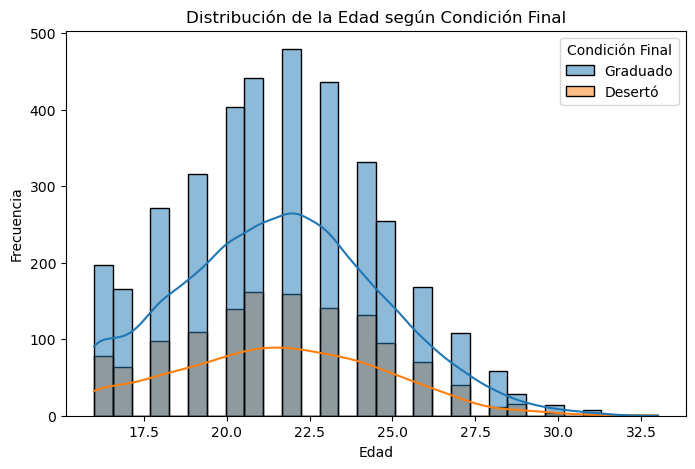

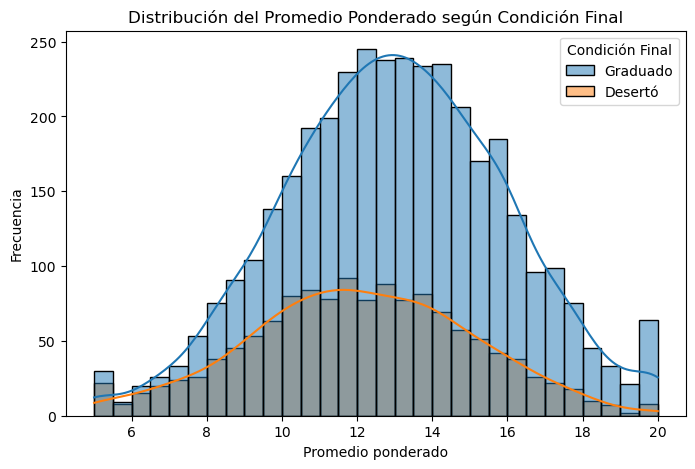

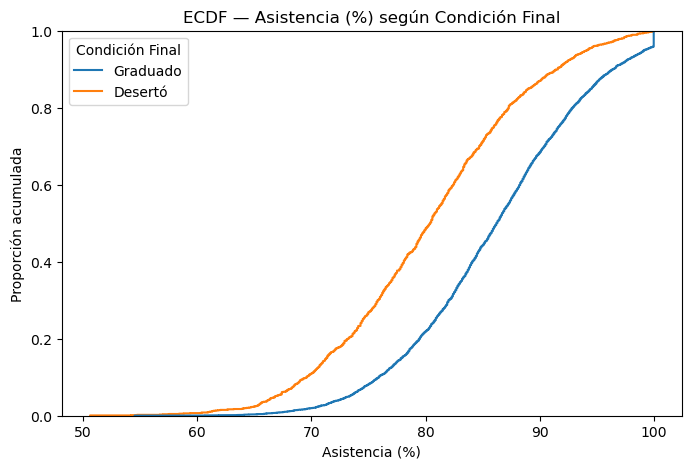

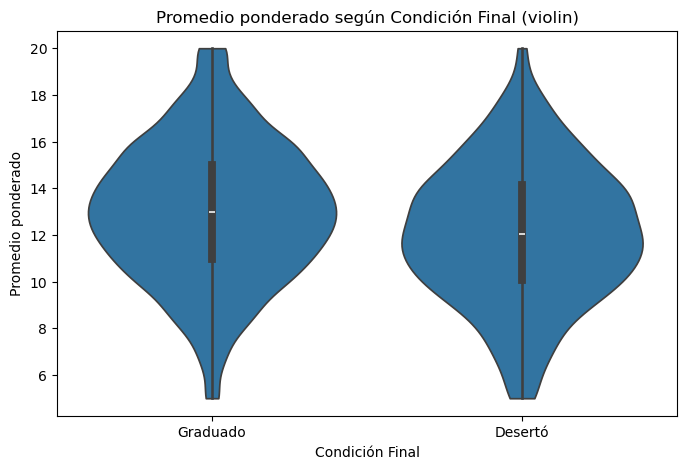

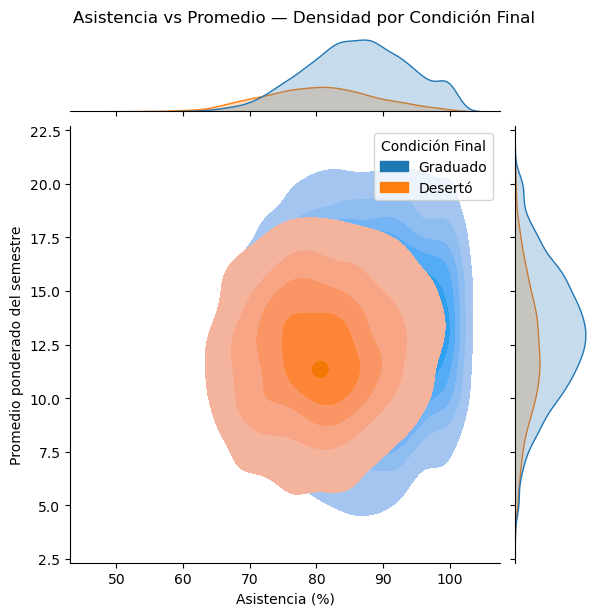

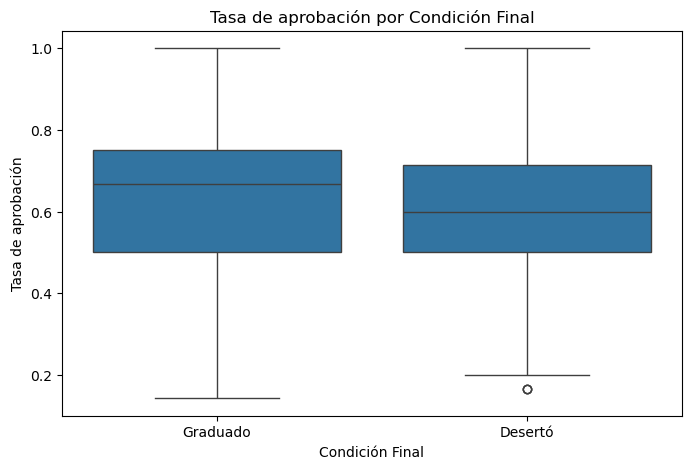

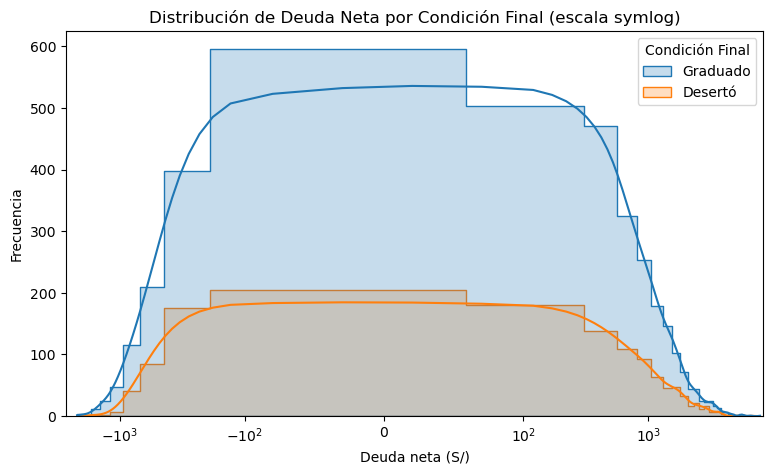

In [32]:
# 1. Distribución de la Edad según Condición Final
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Edad', hue='Condición Final', kde=True, bins=30)
plt.title("Distribución de la Edad según Condición Final")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# 2. Distribución del Promedio ponderado según Condición Final
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Promedio ponderado del semestre', hue='Condición Final', kde=True, bins=30)
plt.title("Distribución del Promedio Ponderado según Condición Final")
plt.xlabel("Promedio ponderado")
plt.ylabel("Frecuencia")
plt.show()

# 3) ECDF de Asistencia por Condición Final (compatible con Jupyter/Seaborn)
# Asegura tipo numérico por si viene como texto
df["Asistencia (%)"] = pd.to_numeric(df["Asistencia (%)"], errors="coerce")

plt.figure(figsize=(8,5))
sns.ecdfplot(data=df, x="Asistencia (%)", hue="Condición Final", stat="proportion")
plt.title("ECDF — Asistencia (%) según Condición Final")
plt.xlabel("Asistencia (%)")
plt.ylabel("Proporción acumulada")
plt.show()

# 4) Violin del Promedio por Condición Final (distribución + mediana)
# Asegura numérico
df["Promedio ponderado del semestre"] = pd.to_numeric(df["Promedio ponderado del semestre"], errors="coerce")

plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x="Condición Final",
    y="Promedio ponderado del semestre",
    inner="box", cut=0
)
plt.title("Promedio ponderado según Condición Final (violin)")
plt.xlabel("Condición Final")
plt.ylabel("Promedio ponderado")
plt.show()

# 5) Asistencia vs Promedio — Densidad por Condición Final
# (A) Intento con jointplot (si tu seaborn lo soporta con hue)
xcol, ycol = "Asistencia (%)", "Promedio ponderado del semestre"
df[xcol] = pd.to_numeric(df[xcol], errors="coerce")
df[ycol] = pd.to_numeric(df[ycol], errors="coerce")

try:
    g = sns.jointplot(
        data=df, x=xcol, y=ycol,
        hue="Condición Final", kind="kde",
        fill=True, height=6, thresh=0.05
    )
    g.fig.suptitle("Asistencia vs Promedio — Densidad por Condición Final", y=1.02)
    plt.show()
except Exception as e:
    # (B) Fallback robusto con subplots y kdeplot
    fig, ax = plt.subplots(figsize=(7,5))
    for label, sub in df.dropna(subset=[xcol,ycol,"Condición Final"]).groupby("Condición Final"):
        sns.kdeplot(
            data=sub, x=xcol, y=ycol,
            fill=True, thresh=0.05, alpha=0.5, ax=ax, label=label
        )
    ax.set_title("Asistencia vs Promedio — Densidad por Condición Final")
    ax.legend()
    plt.show()

# 6) Tasa de aprobación por Condición Final (con limpieza y recorte 0-1)
if "tasa_aprobacion" not in df.columns:
    num_ap = pd.to_numeric(df["Unidades curriculares 1.º semestre (aprobadas)"], errors="coerce")
    num_ev = pd.to_numeric(df["Unidades curriculares 1.º semestre (evaluadas)"], errors="coerce")
    tasa = (num_ap / num_ev).replace([np.inf, -np.inf], np.nan)
    df["tasa_aprobacion"] = tasa.clip(0, 1)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Condición Final", y="tasa_aprobacion")
plt.title("Tasa de aprobación por Condición Final")
plt.xlabel("Condición Final")
plt.ylabel("Tasa de aprobación")
plt.show()

# 7) Presión financiera: Deuda neta por Condición Final (escala symlog segura)
if "deuda_neta" not in df.columns:
    df["Deuda"] = pd.to_numeric(df["Deuda"], errors="coerce")
    df["Descuento"] = pd.to_numeric(df["Descuento"], errors="coerce")
    df["deuda_neta"] = df["Deuda"] - df["Descuento"]

plt.figure(figsize=(9,5))
sns.histplot(
    data=df, x="deuda_neta", hue="Condición Final",
    kde=True, bins=40, element="step", common_norm=False
)
# symlog permite ver bien colas y valores cercanos a 0 (admite negativos y positivos)
plt.xscale("symlog", linthresh=100)
plt.title("Distribución de Deuda Neta por Condición Final (escala symlog)")
plt.xlabel("Deuda neta (S/)")
plt.ylabel("Frecuencia")
plt.show()


In [36]:
# Perfil numérico: estadísticas por Condición Final
# --- Derivadas mínimas que ya tenías ---
if "tasa_aprobacion" not in df.columns:
    df["tasa_aprobacion"] = (
        pd.to_numeric(df["Unidades curriculares 1.º semestre (aprobadas)"], errors="coerce") /
        pd.to_numeric(df["Unidades curriculares 1.º semestre (evaluadas)"], errors="coerce")
    ).replace([np.inf,-np.inf], np.nan).clip(0,1)

if "deuda_neta" not in df.columns:
    df["deuda_neta"] = pd.to_numeric(df["Deuda"], errors="coerce") - pd.to_numeric(df["Descuento"], errors="coerce")

# --- Derivadas adicionales recomendadas ---
ap = pd.to_numeric(df["Unidades curriculares 1.º semestre (aprobadas)"], errors="coerce")
ev = pd.to_numeric(df["Unidades curriculares 1.º semestre (evaluadas)"], errors="coerce")
ma = pd.to_numeric(df["Unidades curriculares 1.º semestre (matriculadas)"], errors="coerce")

df["tasa_evaluacion"] = (ev/ma).replace([np.inf,-np.inf], np.nan).clip(0,1)
df["carga_aprobada"]  = (ap/ma).replace([np.inf,-np.inf], np.nan).clip(0,1)
df["backlog_eval"]    = (ma - ev).clip(lower=0)     # matriculadas no evaluadas
df["backlog_aprob"]   = (ev - ap).clip(lower=0)     # evaluadas no aprobadas

# presión financiera compuesta (z-score simple); morosidad como 0/1
des = pd.to_numeric(df["Descuento"], errors="coerce")
deu = pd.to_numeric(df["Deuda"], errors="coerce")
dn  = pd.to_numeric(df["deuda_neta"], errors="coerce")

def z(s):
    m, sd = s.mean(), s.std(ddof=0)
    return (s - m)/sd if sd not in [0, np.nan] else s*0

df["riesgo_financiero"] = z(dn) - z(des)
df["morosidad_num"]     = (df["Matrícula al día"] == "No").astype(int)

# desempeño continuo
asis = pd.to_numeric(df["Asistencia (%)"], errors="coerce")
tars = pd.to_numeric(df["Desarrollo de Tareas (%)"], errors="coerce")
prom = pd.to_numeric(df["Promedio ponderado del semestre"], errors="coerce")
df["z_asistencia"]      = z(asis)
df["z_tareas"]          = z(tars)
df["z_promedio"]        = z(prom)
df["indice_desempeno"]  = df[["z_asistencia","z_tareas","z_promedio"]].mean(axis=1)

# Likert: total y subíndices (ajusta si cambias tus preguntas)
likert_cols = [c for c in df.columns if c.strip().startswith("¿")]
if likert_cols:
    df["likert_total_mean"] = df[likert_cols].mean(axis=1)

    econ_cols = ["¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?"]
    acad_cols = ["¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?",
                 "¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?"]
    psico_cols= ["¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",
                 "¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?",
                 "¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?"]

    df["likert_economico"]   = df[[c for c in econ_cols  if c in df.columns]].mean(axis=1)
    df["likert_academico"]   = df[[c for c in acad_cols if c in df.columns]].mean(axis=1)
    df["likert_psicosocial"] = df[[c for c in psico_cols if c in df.columns]].mean(axis=1)

# compatibilidad trabajo-estudio
map_lab = {"No Trabaja":0,"Medio Tiempo":1,"Tiempo completo":2}
df["trabajo_ordinal"] = df["Situación laboral"].map(map_lab)
if "¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?" in df.columns:
    df["conflicto_trabajo_estudio"] = df["trabajo_ordinal"] * pd.to_numeric(
        df["¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?"], errors="coerce"
    )

# --- Columnas numéricas a perfilar (base + derivadas) ---
num_cols = [
    "Edad","Promedio ponderado del semestre","Asistencia (%)","Desarrollo de Tareas (%)",
    "tasa_aprobacion","tasa_evaluacion","carga_aprobada","backlog_eval","backlog_aprob",
    "deuda_neta","riesgo_financiero","morosidad_num",
    "z_asistencia","z_tareas","z_promedio","indice_desempeno",
    "likert_total_mean","likert_economico","likert_academico","likert_psicosocial",
    "trabajo_ordinal","conflicto_trabajo_estudio"
]
# filtra solo las que existen (por si algún subíndice no se pudo calcular)
num_cols = [c for c in num_cols if c in df.columns]

# --- Perfil agrupado por etiqueta ---
perfil_num = (
    df.groupby("Condición Final")[num_cols]
      .agg([
          "count","mean","median","std","min",
          lambda s: s.quantile(0.25),
          lambda s: s.quantile(0.75),
          "max"
      ])
      .rename(columns={"<lambda_0>":"p25","<lambda_1>":"p75"})
      .round(3)
)
display(perfil_num)

# Helper: crosstab % por columna (etiqueta) + total por categoría
def ct_pct(col):
    tab = pd.crosstab(df[col], df['Condición Final'])
    pct = (tab / tab.sum(axis=0)) * 100
    pct['Total'] = tab.sum(axis=1)
    return pct.sort_values('Total', ascending=False).round(2)

# --- Perfil categórico: tus 3 tablas base ---
perfil_cat_genero   = ct_pct('Género')
perfil_cat_trabajo  = ct_pct('Situación laboral')
perfil_cat_facultad = ct_pct('Facultad')

display(perfil_cat_genero.round(2))
display(perfil_cat_trabajo.round(2))
display(perfil_cat_facultad.round(2).head())

# === Agrega el resto de categóricas clave ===
otras_cat = [
    'Modo de solicitud','Orden de solicitud','Trasladado(a)',
    'Necesidades educativas especiales','Procedencia','Vivienda',
    'Crianza Adventista','Estado civil',
    'Titulación de la madre','Titulación del padre',
    'Ocupación de la madre','Ocupación del padre',
    'Formas de Pago','Matrícula al día','Becario'
]

perfiles_extra = {c: ct_pct(c) for c in otras_cat if c in df.columns}
for c, tabla in perfiles_extra.items():
    print(f"\nDistribución porcentual por {c}:")
    display(tabla.head(10))  # ajusta .head() si quieres mostrar todo

# Exportar perfiles a CSV
perfil_num.to_csv('perfil_numerico_por_condicion.csv')
perfil_cat_genero.to_csv('perfil_genero_por_condicion.csv')
perfil_cat_trabajo.to_csv('perfil_trabajo_por_condicion.csv')
perfil_cat_facultad.to_csv('perfil_carrera_por_condicion.csv')

print('Archivos CSV exportados.')

Edad                                            \
                count    mean median    std min   p25   p75 max   
Condición Final                                                   
Desertó          1321  21.597   22.0  3.128  16  19.0  24.0  33   
Graduado         3679  21.595   22.0  3.052  16  19.0  24.0  31   

                Promedio ponderado del semestre          ... trabajo_ordinal  \
                                          count    mean  ...             p75   
Condición Final                                          ...                   
Desertó                                    1321  12.095  ...             1.0   
Graduado                                   3679  12.981  ...             1.0   

                    conflicto_trabajo_estudio                                \
                max                     count   mean median    std min  p25   
Condición Final                                                               
Desertó           2                      1321  2.397    0.0  3.264   0  0.0   
Graduado          2                      3679  1.970    0.0  3.020   0  0.0   

                          
                 p75 max  
Condición Final           
Desertó          4.0  10  
Graduado         4.0  10  

[2 rows x 176 columns]

Condición Final,Desertó,Graduado,Total
Género,,,
M,54.35,55.23,2750
H,45.65,44.77,2250


Condición Final,Desertó,Graduado,Total
Situación laboral,,,
No Trabaja,52.23,58.14,2829
Medio Tiempo,29.30,26.72,1370
Tiempo completo,18.47,15.14,801


Condición Final,Desertó,Graduado,Total
Facultad,,,
Ciencias Empresariales,32.63,28.49,1479
Ingeniería y Arquitectura,34.22,25.33,1384
Ciencias de la Salud,10.45,23.89,1017
Ciencias Humanas y Educación,19.83,18.18,931
Teología,2.88,4.10,189



Distribución porcentual por Modo de solicitud:


Condición Final,Desertó,Graduado,Total
Modo de solicitud,,,
Examen de admisión ordinario,58.14,60.89,3008
Ingreso directo,21.57,19.46,1001
Ingreso por convenio o beca especial,7.49,6.99,356
Ingreso por traslado externo,4.16,4.76,230
Ingreso por traslado interno,4.09,4.24,210
Ingreso por reingreso,4.54,3.67,195



Distribución porcentual por Orden de solicitud:


Condición Final,Desertó,Graduado,Total
Orden de solicitud,,,
Primera Opción,68.28,69.48,3458
Segunda Opción,24.30,23.10,1171
Tercera Opción,7.42,7.42,371



Distribución porcentual por Trasladado(a):


Condición Final,Desertó,Graduado,Total
Trasladado(a),,,
No,88.19,90.49,4494
Sí,11.81,9.51,506



Distribución porcentual por Necesidades educativas especiales:


Condición Final,Desertó,Graduado,Total
Necesidades educativas especiales,,,
No,96.59,97.47,4862
Sí,3.41,2.53,138



Distribución porcentual por Procedencia:


Condición Final,Desertó,Graduado,Total
Procedencia,,,
Lima,50.11,56.18,2729
Provincia,44.13,39.17,2024
Extranjero,5.75,4.65,247



Distribución porcentual por Vivienda:


Condición Final,Desertó,Graduado,Total
Vivienda,,,
Familiares,48.90,49.61,2471
Alquila cuarto,26.42,25.31,1280
Residencia,24.68,25.09,1249



Distribución porcentual por Crianza Adventista:


Condición Final,Desertó,Graduado,Total
Crianza Adventista,,,
Sí,62.91,65.24,3231
No,37.09,34.76,1769



Distribución porcentual por Estado civil:


Condición Final,Desertó,Graduado,Total
Estado civil,,,
Soltero,94.47,95.24,4752
Casado,5.53,4.76,248



Distribución porcentual por Titulación de la madre:


Condición Final,Desertó,Graduado,Total
Titulación de la madre,,,
Secundaria,38.76,38.11,1914
Técnica,26.27,25.03,1268
Educación Superior,19.68,21.47,1050
Primaria,11.73,11.80,589
Sin estudios,3.56,3.59,179



Distribución porcentual por Titulación del padre:


Condición Final,Desertó,Graduado,Total
Titulación del padre,,,
Secundaria,33.99,34.00,1700
Educación Superior,28.92,27.97,1411
Técnica,22.94,22.70,1138
Primaria,11.13,12.61,611
Sin estudios,3.03,2.72,140



Distribución porcentual por Ocupación de la madre:


Condición Final,Desertó,Graduado,Total
Ocupación de la madre,,,
Ama de casa / labores del hogar,16.28,16.42,819
Servicios personales y domésticos,16.50,15.98,806
Comerciantes / vendedores,15.14,16.09,792
Profesionales y técnicos,12.94,13.45,666
Obreros / trabajadores manuales,11.20,12.50,608
Empleados administrativos / de oficina,9.99,9.73,490
Agricultores / ganaderos / pescadores,6.96,6.14,318
Desempleado / sin ocupación,5.30,4.81,247
Otros / no especificado,3.33,2.77,146



Distribución porcentual por Ocupación del padre:


Condición Final,Desertó,Graduado,Total
Ocupación del padre,,,
Comerciantes / vendedores,19.76,21.26,1043
Obreros / trabajadores manuales,21.80,20.52,1043
Profesionales y técnicos,15.22,15.60,775
Desempleado / sin ocupación,8.86,9.65,472
Empleados administrativos / de oficina,9.99,9.00,463
Servicios personales y domésticos,7.72,8.67,421
Agricultores / ganaderos / pescadores,7.65,6.69,347
Otros / no especificado,4.47,3.62,192
Militares / policías / fuerzas del orden,2.80,2.94,145



Distribución porcentual por Formas de Pago:


Condición Final,Desertó,Graduado,Total
Formas de Pago,,,
Armadas,56.93,55.56,2796
Contado,34.60,34.19,1715
Otros,8.48,10.25,489



Distribución porcentual por Matrícula al día:


Condición Final,Desertó,Graduado,Total
Matrícula al día,,,
Sí,81.91,89.94,4391
No,18.09,10.06,609



Distribución porcentual por Becario:


Condición Final,Desertó,Graduado,Total
Becario,,,
No,90.08,85.59,4339
Sí,9.92,14.41,661


Archivos CSV exportados.


### 3.6 Hallazgos

#### Hallazgos del Paso 3: Descriptive analysis

- Registros: **5.000** estudiantes.  
- Variables totales: **42** columnas (incluye identificadores, predictores y variable objetivo).  
- Variable objetivo: **`Condición Final`** (Graduado ó Desertó). 
  - Interpretación: la proporción entre graduados y desertores está relativamente balanceada, lo que facilita el entrenamiento sin necesidad inmediata de técnicas pesadas de remuestreo.

---

## A. Variables (tipos y codificaciones reales en la data)

**Categóricas (texto):**
- `Género` → {**H**, **M**}
- `Modo de solicitud` → {Examen de admisión ordinario, Ingreso por traslado externo, Ingreso por traslado interno, Ingreso por convenio o beca especial, Ingreso directo, Ingreso por reingreso}
- `Orden de solicitud` → {**Primera Opción**, **Segunda Opción**, **Tercera Opción**}
- `Facultad` → {Ciencias Empresariales, Ciencias Humanas y Educación, Ingeniería y Arquitectura, Ciencias de la Salud, Teología}
- `Trasladado(a)` → {**Sí**, **No**}
- `Necesidades educativas especiales` → {**Sí**, **No**}
- `Procedencia` → {Lima, Provincia, Extranjero}
- `Vivienda` → {Residencia, Familiares, Alquila cuarto}
- `Crianza Adventista` → {**Sí**, **No**}
- `Estado civil` → {Soltero, Casado}
- `Titulación de la madre` / `Titulación del padre` → {Sin estudios, Primaria, Secundaria, Técnica, Educación Superior}
- `Ocupación de la madre` / `Ocupación del padre` → {Profesionales y técnicos; Empleados administrativos / de oficina; Comerciantes / vendedores; Obreros / trabajadores manuales; Agricultores / ganaderos / pescadores; Militares / policías / fuerzas del orden; Servicios personales y domésticos; Ama de casa / labores del hogar; Desempleado / sin ocupación; Otros / no especificado}
- `Formas de Pago` → {Armadas, Contado, Otros}
- `Matrícula al día` → {**Sí**, **No**}
- `Becario` → {**Sí**, **No**}
- `Situación laboral` → {No Trabaja, Medio Tiempo, Tiempo completo}

**Numéricas:**
- `Nombres Completos` (texto; **no predictiva**, solo trazabilidad).
- `Edad` (entero, años).
- `Descuento` (**monto** en S/ — continuo; *no es código*).
- `Deuda` (**monto** en S/ — continuo).
- `Unidades curriculares 1.º semestre (matriculadas / evaluadas / aprobadas)` (enteros).
- `Desarrollo de Tareas (%)` (0–100).
- `Asistencia (%)` (0–100).
- `Promedio ponderado del semestre` (0–20).

**Ítems Likert (1–5) — riesgo auto-percibido de deserción:**
- 13 preguntas en escala **1–5** (1=Totalmente en desacuerdo … 5=Totalmente de acuerdo). Mayor valor ⇒ **mayor riesgo** percibido.

**Etiqueta (objetivo):**
- `Condición Final` → {**Graduado**, **Desertó**}.

---

## B. Tablas de referencia

**Facultad:**
- Ciencias Empresariales  
- Ciencias Humanas y Educación  
- Ingeniería y Arquitectura  
- Ciencias de la Salud  
- Teología

**Ocupación (padre/madre):**
- Profesionales y técnicos  
- Empleados administrativos / de oficina  
- Comerciantes / vendedores  
- Obreros / trabajadores manuales  
- Agricultores / ganaderos / pescadores  
- Militares / policías / fuerzas del orden  
- Servicios personales y domésticos  
- Ama de casa / labores del hogar  
- Desempleado / sin ocupación  
- Otros / no especificado

**Escala Likert (aplicable a las 13 preguntas):**
- 1 = Totalmente en desacuerdo (riesgo muy bajo)  
- 2 = En desacuerdo (bajo)  
- 3 = Ni de acuerdo ni en desacuerdo (medio)  
- 4 = De acuerdo (alto)  
- 5 = Totalmente de acuerdo (muy alto)

### C. Variables derivadas (usadas en análisis/modelo)
- `tasa_aprobacion` = aprobadas / evaluadas  
- `tasa_evaluacion` = evaluadas / matriculadas  
- `carga_aprobada` = aprobadas / matriculadas  
- `backlog_eval` = matriculadas − evaluadas  
- `backlog_aprob` = evaluadas − aprobadas  
- `deuda_neta` = Deuda − Descuento  
- `indice_desempeno` = promedio de z-scores de Asistencia, Tareas y Promedio  
- Subíndices Likert: `likert_economico`, `likert_academico`, `likert_psicosocial`


> **Notas importantes:**  
> - En este dataset, **no** existe `Carrera` ni códigos numéricos para categorías; todo viene **como texto** (ej. `Facultad`, `Ocupación`, etc.).  
> - `Descuento` y `Deuda` son **montos** (S/), no catálogos.  
> - `Nombres Completos` es solo informativa; se excluye del modelado.

---

### D. Hallazgos claves
### Hallazgos clave (numéricos)
- **Rendimiento académico más bajo en desertores:**  
  Promedio ponderado **12.10** vs **12.98** en graduados. La **edad** tiene medianas iguales (22) y medias ~21.6, por lo que la diferencia está en el **rendimiento**, no en la edad.
- **“Conflicto trabajo–estudio”** más alto en desertores:  
  Media **2.40** vs **1.97** (escala compuesta), reforzando el rol del **empleo** y la **incompatibilidad** percibida.
- **Edad** prácticamente **no discrimina** (medianas iguales; diferencias marginales en la media).

### Hallazgos clave (categóricas)
- **Situación laboral:** mayor peso de **tiempo completo** y **medio tiempo** entre desertores (**18.5%** y **29.3%**) vs graduados (**15.1%** y **26.7%**).  
  → Trabajar más horas se asocia con **mayor deserción**.
- **Matrícula al día:** efecto **muy fuerte**. **No** aparece más en desertores (**18.1%**) que en graduados (**10.1%**).  
  → Indicador de **morosidad** muy alineado a la deserción.
- **Becario:** factor **protector**. Desertores con beca **9.9%** vs graduados **14.4%**.  
  → Beneficios/ayudas se asocian a **continuidad**.
- **Facultad:**  
  - **Ingeniería y Arquitectura** y **Ciencias Empresariales** concentran más desertores (**34.2%** y **32.6%** dentro de “Desertó”).  
  - **Ciencias de la Salud** muestra perfil más de **Graduado** (**23.9%** de “Graduado” vs **10.5%** de “Desertó”).  
  → Diferencias **estructurales** por escuela.
- **Procedencia:** **Provincia** pesa más en “Desertó” (**44.1%**) que en “Graduado” (**39.2%**). **Lima** al revés (**50.1%** vs **56.2%**).  
  → Posible efecto de **distancia/adaptación/recursos**.
- **Trasladado(a)** y **NEE:** algo más frecuentes en “Desertó” (**11.8%** vs **9.5%** y **3.4%** vs **2.5%**).  
  → Señales de **riesgo moderado**.
- **Género, Vivienda, Estado civil, Formas de pago, Titulaciones y Ocupaciones:** diferencias **suaves**; útiles para el modelo pero con **menor poder explicativo** individual.
- **Orden/Modo de solicitud:** diferencias leves (p.ej., algo más de **ingreso directo** en desertores); no parecen **drivers** principales.

### Lectura ejecutiva
Los factores más asociados a la deserción (en este corte) son:  
**(1)** desempeño académico (promedio), **(2)** morosidad/matrícula y deuda (derivadas), **(3)** empleo y **conflicto trabajo–estudio**, **(4)** **facultad** (segmentación clara), **(5)** procedencia **no Lima**, y **(6)** menor acceso a **beca**.  
**Edad** no explica; **género** aporta poco; **vivienda** y **formas de pago** son secundarios.

### Recomendaciones prácticas
- **Alertas tempranas:** umbrales en **Promedio** (p.ej., < **12.5**), **Asistencia** (< **80–85%**), **Matrícula al día = No**, **deuda_banda** alta, **trabajo_ordinal ≥ 1** y **conflicto trabajo–estudio** alto.
- **Focalizar por Facultad:** planes de retención específicos para **Ing./Arqu.** y **Empresariales**.
- **Soporte financiero:** ampliar/optimizar **becas** y **facilidades de pago** (impacto protector).
- **Flexibilidad académica** para estudiantes que **trabajan** (horarios, modalidades, tutorías).
- **Acompañamiento** a estudiantes de **Provincia/Extranjero** (integración, bienestar).

> **Nota:** estos patrones provienen de **datos sintéticos calibrados**; son ideales para **entrenar y probar** el pipeline, pero conviene **validar** contra datos reales de la UPeU antes de decisiones de política.

## Fase 3. Data Preparation

### 🧹 4. Data cleaning

#### 4.1 Selección inicial de variables claves

Queremos construir un modelo que pueda predecir la deserción de estudiantes dentro de la Universidad Peruana Unión. Para ello tendremos en cuenta la variable Condición Final (Categorica: Graduado ó Desertó).


## Guía de selección de variables (Data Preparation)

### Núcleo (más señal según el análisis)

**Académicas / desempeño**
- `Promedio ponderado del semestre`, `Asistencia (%)`, `Desarrollo de Tareas (%)`
- `tasa_aprobacion`, `tasa_evaluacion`, `carga_aprobada`
- `backlog_eval` (matriculadas − evaluadas), `backlog_aprob` (evaluadas − aprobadas)

**Finanzas**
- `Deuda`, `Descuento`, `deuda_neta`
- `Matrícula al día`, `Formas de Pago`, `Becario`

**Trabajo / compatibilidad**
- `Situación laboral`, `trabajo_ordinal`, `conflicto_trabajo_estudio`

**Contexto académico**
- `Facultad`, `Orden de solicitud`, `Modo de solicitud`

**Contexto personal / social**
- `Procedencia`, `Vivienda`, `Trasladado(a)`, `Necesidades educativas especiales`

---

### Likert (riesgo auto-percibido)
- **Las 13 preguntas Likert (1–5)** como numéricas (ordinales).
- Agregados opcionales: `likert_total_mean`, `likert_economico`, `likert_academico`, `likert_psicosocial`.

---

### Secundarias (señal más suave, igual útiles)
- `Género`, `Edad`, `Crianza Adventista`, `Estado civil`
- `Titulación de la madre`, `Titulación del padre`
- `Ocupación de la madre`, `Ocupación del padre`

---

### Descarta (no predictivas / potencial ruido)
- Identificadores: `Nombres Completos`.
- **Etiqueta (objetivo)**: `Condición Final` (solo como `y`).

---

> ⚠️ **Fuga temporal**  
> Si el objetivo es predecir deserción **antes de terminar el 1.º semestre**, evita usar variables que requieren resultados del semestre (p.ej., `evaluadas`, `aprobadas`, `tasa_aprobacion`, `carga_aprobada`, `tasa_evaluacion`, `backlog_*`). Úsalas solo si la predicción es **posterior** a esas mediciones.


---



In [37]:
# Variables a conservar como predictores

# --- (1) Asegura derivadas necesarias (solo si se pueden calcular) ---
ap_col = "Unidades curriculares 1.º semestre (aprobadas)"
ev_col = "Unidades curriculares 1.º semestre (evaluadas)"
ma_col = "Unidades curriculares 1.º semestre (matriculadas)"

if all(c in df.columns for c in [ap_col, ev_col, ma_col]):
    ap = pd.to_numeric(df[ap_col], errors="coerce")
    ev = pd.to_numeric(df[ev_col], errors="coerce")
    ma = pd.to_numeric(df[ma_col], errors="coerce")
    df["tasa_aprobacion"] = (ap/ev).replace([np.inf, -np.inf], np.nan).clip(0,1)
    df["tasa_evaluacion"] = (ev/ma).replace([np.inf, -np.inf], np.nan).clip(0,1)
    df["carga_aprobada"]  = (ap/ma).replace([np.inf, -np.inf], np.nan).clip(0,1)
    df["backlog_eval"]    = (ma - ev).clip(lower=0)
    df["backlog_aprob"]   = (ev - ap).clip(lower=0)

if "Deuda" in df.columns and "Descuento" in df.columns:
    df["deuda_neta"] = pd.to_numeric(df["Deuda"], errors="coerce") - pd.to_numeric(df["Descuento"], errors="coerce")

if "Situación laboral" in df.columns:
    df["trabajo_ordinal"] = df["Situación laboral"].map({"No Trabaja":0, "Medio Tiempo":1, "Tiempo completo":2})

likert_incompat = "¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?"
if "trabajo_ordinal" in df.columns and likert_incompat in df.columns:
    df["conflicto_trabajo_estudio"] = df["trabajo_ordinal"] * pd.to_numeric(df[likert_incompat], errors="coerce")

# --- (2) Lista de predictores
features_keep = [
    # Académicas / desempeño
    "Promedio ponderado del semestre", "Asistencia (%)", "Desarrollo de Tareas (%)", "tasa_aprobacion",
    "tasa_evaluacion", "carga_aprobada",
    "backlog_eval", "backlog_aprob",
    
    # Finanzas
    "Deuda", "deuda_neta", "Formas de Pago",
    "Matrícula al día", "Becario",
    
    # Trabajo / compatibilidad
    "Situación laboral",
    "conflicto_trabajo_estudio",
    "trabajo_ordinal",

    # Contexto académico
    "Facultad", "Orden de solicitud", "Modo de solicitud",
    
     # Contexto personal / social
    "Procedencia", "Vivienda", "Necesidades educativas especiales", "Trasladado(a)", 

    # variables secundarios con señal suave:
    "Edad","Género","Crianza Adventista","Estado civil",
    "Titulación de la madre","Titulación del padre","Ocupación de la madre","Ocupación del padre"
]

# (las preguntas Likert como predictores
likert_cols = [c for c in df.columns if c.strip().startswith("¿")]
features_keep = list(dict.fromkeys(features_keep + likert_cols))  # sin duplicados, preserva orden

# Variable objetivo
target = "Condición Final"

# Crear dataset filtrado
presentes = [c for c in features_keep if c in df.columns]
faltantes = [c for c in features_keep if c not in df.columns]
if faltantes:
    print("Advertencia: columnas faltantes y no incluidas:", faltantes)

cols_finales = presentes + ([target] if target in df.columns else [])
df_sel = df[cols_finales].copy()

print("df_sel.shape:", df_sel.shape)
print("df_sel.columns:", df_sel.columns.tolist())
df_sel.head(3)

df_sel.shape: (5000, 45)
df_sel.columns: ['Promedio ponderado del semestre', 'Asistencia (%)', 'Desarrollo de Tareas (%)', 'tasa_aprobacion', 'tasa_evaluacion', 'carga_aprobada', 'backlog_eval', 'backlog_aprob', 'Deuda', 'deuda_neta', 'Formas de Pago', 'Matrícula al día', 'Becario', 'Situación laboral', 'conflicto_trabajo_estudio', 'trabajo_ordinal', 'Facultad', 'Orden de solicitud', 'Modo de solicitud', 'Procedencia', 'Vivienda', 'Necesidades educativas especiales', 'Trasladado(a)', 'Edad', 'Género', 'Crianza Adventista', 'Estado civil', 'Titulación de la madre', 'Titulación del padre', 'Ocupación de la madre', 'Ocupación del padre', '¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?', '¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?', '¿La calidad de la enseñanza y las metodologías docentes me desmotivan al punto de pensar en abandonar?', '¿La falta de recursos 

,Promedio ponderado del semestre,Asistencia (%),Desarrollo de Tareas (%),tasa_aprobacion,tasa_evaluacion,carga_aprobada,backlog_eval,backlog_aprob,Deuda,deuda_neta,...,"¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?","¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?,"¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?","¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?",Condición Final
0,16.64,84.0,83.9,0.800000,1.000000,0.800000,0,1,2735.37,2343.24,...,2,3,5,2,3,3,4,4,2,Graduado
1,13.76,80.5,69.6,0.800000,0.833333,0.666667,1,1,3833.77,3471.58,...,3,2,1,1,5,2,3,5,5,Graduado
2,9.95,84.0,82.5,0.428571,0.875000,0.375000,1,4,1080.84,559.95,...,1,3,3,4,5,5,1,5,3,Graduado


In [38]:
# 1. Revisar duplicados en todo el DataFrame
duplicates_count = df_sel.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicates_count}")

# 2. Si quieres eliminar duplicados:
if duplicates_count > 0:
    df_sel = df_sel.drop_duplicates()
    print(f"Nueva forma del DataFrame después de eliminar duplicados: {df_sel.shape}")

Cantidad de filas duplicadas: 0


In [39]:
# 2. Revisar outliers en Edad
age_summary = df_sel['Edad'].describe()
print(age_summary)

# Consideraremos como outliers:
# - edades negativas (< 0) (no tienen sentido)
# - edades mayores a 60 (umbral razonable para estudiantes universitarios)
outliers_high = df_sel[df_sel['Edad'] > 60].shape[0]
outliers_low = df_sel[df_sel['Edad'] < 0].shape[0]

print("Cantidad de outliers por edad muy alta (>60):", outliers_high)
print("Cantidad de outliers por edad negativa (<0):", outliers_low)



count    5000.000000
mean       21.595400
std         3.072065
min        16.000000
25%        19.000000
50%        22.000000
75%        24.000000
max        33.000000
Name: Edad, dtype: float64
Cantidad de outliers por edad muy alta (>60): 0
Cantidad de outliers por edad negativa (<0): 0


In [40]:
# 3. Revisar valores faltantes
missing_values = df_sel.isnull().sum()
missing_percent = (df_sel.isnull().sum() / len(df_sel)) * 100

missing_df = pd.DataFrame({
    'Valores faltantes': missing_values,
    'Porcentaje (%)': missing_percent.round(2)
}).sort_values(by='Valores faltantes', ascending=False)

print("Resumen de valores faltantes en el dataset:")
display(missing_df.head(10))  # mostramos las 10 columnas con más nulos

Resumen de valores faltantes en el dataset:


,Valores faltantes,Porcentaje (%)
Promedio ponderado del semestre,0,0.0
Edad,0,0.0
Crianza Adventista,0,0.0
Estado civil,0,0.0
Titulación de la madre,0,0.0
Titulación del padre,0,0.0
Ocupación de la madre,0,0.0
Ocupación del padre,0,0.0
¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?,0,0.0
¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?,0,0.0


In [41]:
#porcentaje de valores null por columna
miss = (df_sel.isnull().sum() / len(df_sel))*100
miss.sort_values(inplace=True)
miss

Promedio ponderado del semestre                                                                                             0.0
Género                                                                                                                      0.0
Crianza Adventista                                                                                                          0.0
Estado civil                                                                                                                0.0
Titulación de la madre                                                                                                      0.0
Titulación del padre                                                                                                        0.0
Ocupación de la madre                                                                                                       0.0
Ocupación del padre                                                                                     

In [42]:
df_sel

,Promedio ponderado del semestre,Asistencia (%),Desarrollo de Tareas (%),tasa_aprobacion,tasa_evaluacion,carga_aprobada,backlog_eval,backlog_aprob,Deuda,deuda_neta,...,"¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?","¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?,"¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?","¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?",Condición Final
0,16.64,84.0,83.9,0.800000,1.000000,0.800000,0,1,2735.37,2343.24,...,2,3,5,2,3,3,4,4,2,Graduado
1,13.76,80.5,69.6,0.800000,0.833333,0.666667,1,1,3833.77,3471.58,...,3,2,1,1,5,2,3,5,5,Graduado
2,9.95,84.0,82.5,0.428571,0.875000,0.375000,1,4,1080.84,559.95,...,1,3,3,4,5,5,1,5,3,Graduado
3,16.08,83.8,83.7,0.666667,0.750000,0.500000,1,1,779.52,192.28,...,3,1,2,2,4,3,1,4,1,Graduado
4,13.08,81.7,100.0,0.571429,0.875000,0.500000,1,3,560.90,-152.88,...,5,1,3,2,2,4,5,5,3,Graduado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12.91,84.5,85.2,0.600000,1.000000,0.600000,0,2,511.76,297.20,...,1,1,4,5,1,3,1,1,1,Graduado
4996,7.26,81.4,79.1,0.250000,0.800000,0.200000,1,3,1154.93,276.25,...,1,1,3,1,1,2,4,2,3,Desertó
4997,16.72,66.6,82.2,0.833333,1.000000,0.833333,0,1,325.72,-376.06,...,5,1,2,4,1,1,2,5,2,Graduado
4998,13.69,83.5,63.6,0.750000,1.000000,0.750000,0,2,443.85,105.26,...,5,1,2,1,4,2,2,3,5,Graduado


In [43]:
#Eliminar los valores nulos, este paso no es necesario
df_clean = df_sel.dropna()
print('df_sel.shape:',df_sel.shape)
print('df_clean.shape:',df_clean.shape)

df_sel.shape: (5000, 45)
df_clean.shape: (5000, 45)


In [45]:
# 
df_clean.describe()

,Promedio ponderado del semestre,Asistencia (%),Desarrollo de Tareas (%),tasa_aprobacion,tasa_evaluacion,carga_aprobada,backlog_eval,backlog_aprob,Deuda,deuda_neta,...,"¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?","¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?","¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?,"¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?","¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?"
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.00000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12.746932,84.553320,79.18682,0.637687,0.911301,0.581535,0.497200,1.99020,960.131896,461.973264,...,3.556400,2.81800,2.93060,2.68920,2.6956,2.865000,3.333400,2.866200,2.858800,2.756600
std,2.990212,8.251159,10.12695,0.161207,0.094517,0.160582,0.500042,1.05201,885.856249,957.352515,...,1.450669,1.51807,1.53214,1.50886,1.5402,1.528673,1.531507,1.535959,1.539525,1.518755
min,5.000000,50.600000,38.30000,0.142857,0.750000,0.125000,0.000000,0.00000,0.870000,-2183.440000,...,1.000000,1.00000,1.00000,1.00000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,10.710000,79.000000,72.50000,0.500000,0.833333,0.500000,0.000000,1.00000,331.012500,-150.907500,...,2.000000,1.00000,1.00000,1.00000,1.0000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,12.760000,84.700000,79.30000,0.666667,1.000000,0.571429,0.000000,2.00000,712.790000,265.260000,...,4.000000,3.00000,3.00000,3.00000,2.0000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,14.800000,90.500000,86.12500,0.750000,1.000000,0.714286,1.000000,3.00000,1291.522500,872.500000,...,5.000000,4.00000,4.00000,4.00000,4.0000,4.000000,5.000000,4.000000,4.000000,4.000000
max,20.000000,100.000000,100.00000,1.000000,1.000000,1.000000,1.000000,6.00000,8000.000000,7782.810000,...,5.000000,5.00000,5.00000,5.00000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000


In [46]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Promedio ponderado del semestre                                                                                           5000 non-null   float64
 1   Asistencia (%)                                                                                                            5000 non-null   float64
 2   Desarrollo de Tareas (%)                                                                                                  5000 non-null   float64
 3   tasa_aprobacion                                                                                                           5000 non-nu

In [47]:
#separate variables into new data frames

numeric_data = df_clean.select_dtypes(include=[np.number])
categor_data = df_clean.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 26 numeric and 19 categorical columns in train data


In [48]:
numeric_data.describe()

,Promedio ponderado del semestre,Asistencia (%),Desarrollo de Tareas (%),tasa_aprobacion,tasa_evaluacion,carga_aprobada,backlog_eval,backlog_aprob,Deuda,deuda_neta,...,"¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?","¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?","¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?,"¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?","¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?"
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.00000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12.746932,84.553320,79.18682,0.637687,0.911301,0.581535,0.497200,1.99020,960.131896,461.973264,...,3.556400,2.81800,2.93060,2.68920,2.6956,2.865000,3.333400,2.866200,2.858800,2.756600
std,2.990212,8.251159,10.12695,0.161207,0.094517,0.160582,0.500042,1.05201,885.856249,957.352515,...,1.450669,1.51807,1.53214,1.50886,1.5402,1.528673,1.531507,1.535959,1.539525,1.518755
min,5.000000,50.600000,38.30000,0.142857,0.750000,0.125000,0.000000,0.00000,0.870000,-2183.440000,...,1.000000,1.00000,1.00000,1.00000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,10.710000,79.000000,72.50000,0.500000,0.833333,0.500000,0.000000,1.00000,331.012500,-150.907500,...,2.000000,1.00000,1.00000,1.00000,1.0000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,12.760000,84.700000,79.30000,0.666667,1.000000,0.571429,0.000000,2.00000,712.790000,265.260000,...,4.000000,3.00000,3.00000,3.00000,2.0000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,14.800000,90.500000,86.12500,0.750000,1.000000,0.714286,1.000000,3.00000,1291.522500,872.500000,...,5.000000,4.00000,4.00000,4.00000,4.0000,4.000000,5.000000,4.000000,4.000000,4.000000
max,20.000000,100.000000,100.00000,1.000000,1.000000,1.000000,1.000000,6.00000,8000.000000,7782.810000,...,5.000000,5.00000,5.00000,5.00000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: >

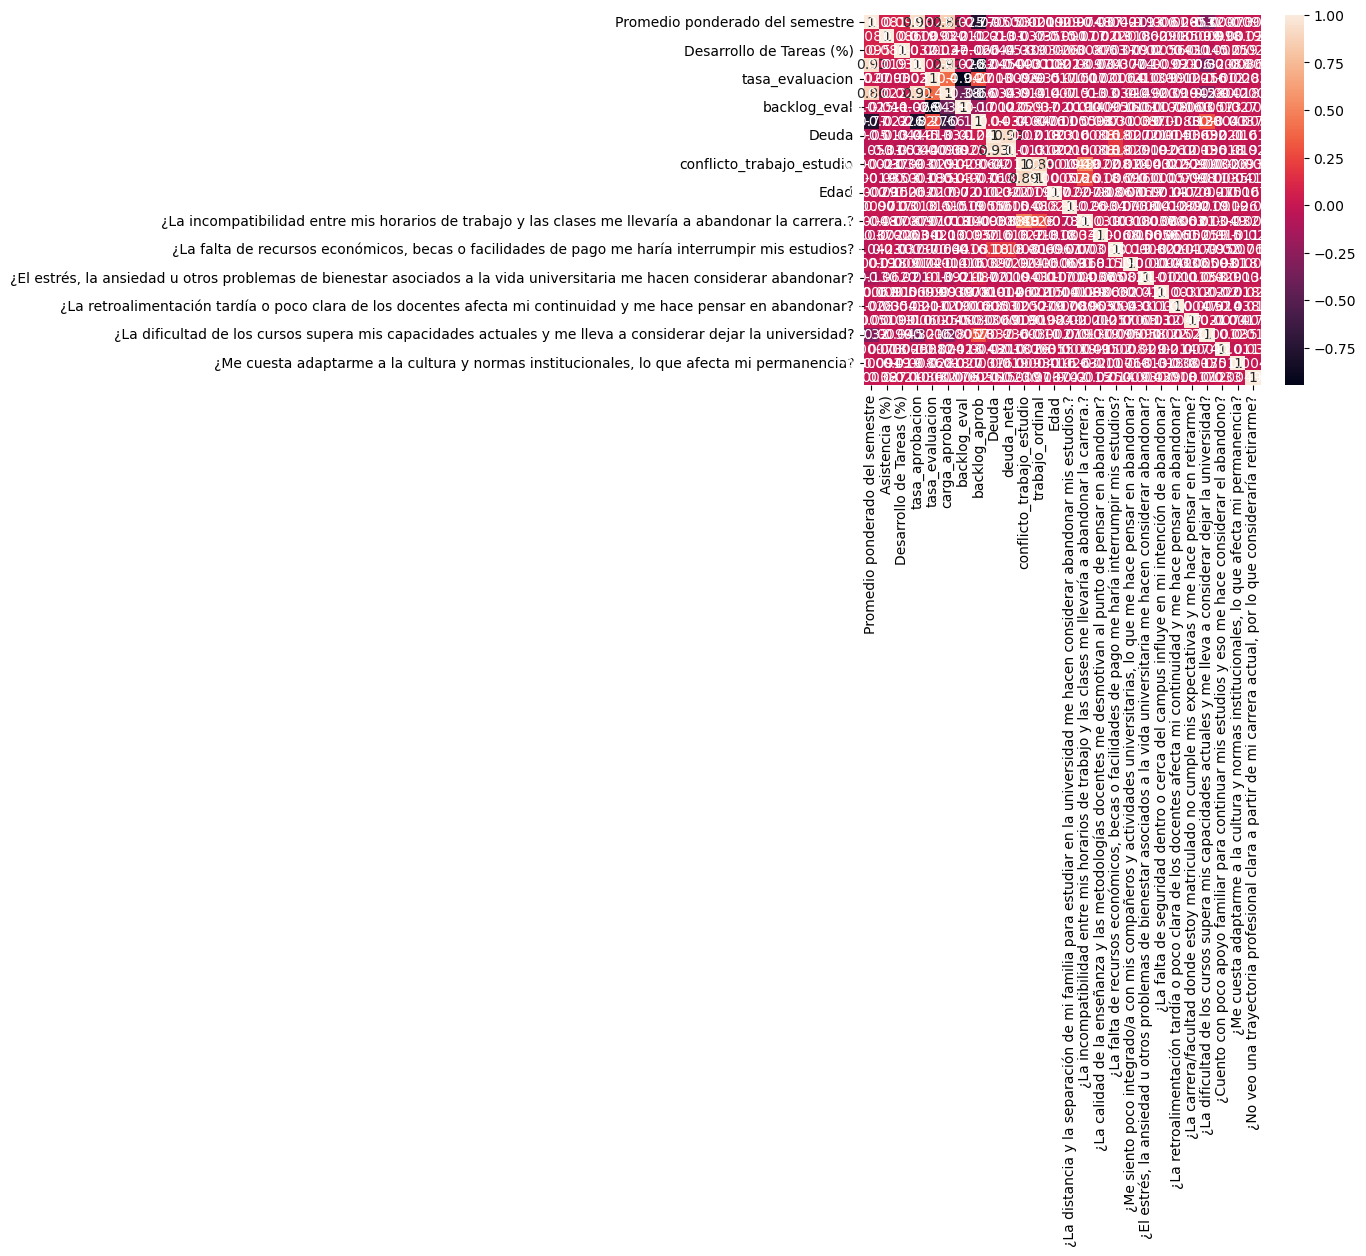

In [49]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, annot=True)

In [50]:
#Esto es para ver si hay variables categoricas
categor_data.describe()

,Formas de Pago,Matrícula al día,Becario,Situación laboral,Facultad,Orden de solicitud,Modo de solicitud,Procedencia,Vivienda,Necesidades educativas especiales,Trasladado(a),Género,Crianza Adventista,Estado civil,Titulación de la madre,Titulación del padre,Ocupación de la madre,Ocupación del padre,Condición Final
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,3,2,2,3,5,3,6,3,3,2,2,2,2,2,5,5,10,10,2
top,Armadas,Sí,No,No Trabaja,Ciencias Empresariales,Primera Opción,Examen de admisión ordinario,Lima,Familiares,No,No,M,Sí,Soltero,Secundaria,Secundaria,Ama de casa / labores del hogar,Comerciantes / vendedores,Graduado
freq,2796,4391,4339,2829,1479,3458,3008,2729,2471,4862,4494,2750,3231,4752,1914,1700,819,1043,3679


In [51]:
print('numeric_data.columns:',numeric_data.columns)
print('categor_data.columns:',categor_data.columns)

numeric_data.columns: Index(['Promedio ponderado del semestre', 'Asistencia (%)',
       'Desarrollo de Tareas (%)', 'tasa_aprobacion', 'tasa_evaluacion',
       'carga_aprobada', 'backlog_eval', 'backlog_aprob', 'Deuda',
       'deuda_neta', 'conflicto_trabajo_estudio', 'trabajo_ordinal', 'Edad',
       '¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?',
       '¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?',
       '¿La calidad de la enseñanza y las metodologías docentes me desmotivan al punto de pensar en abandonar?',
       '¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?',
       '¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?',
       '¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar

### 🧹 5. Data transformation

In [52]:
data=df_clean

In [53]:
# 1) Target binaria robusta
# ---------------------------
# Soporta texto ("Graduado"/"Desertó") o códigos (1/2)
if data["Condición Final"].dtype == "O":
    target_map = {"Graduado": 0, "Desertó": 1}
else:
    # Tu convención: 1=Graduado ->0 ; 2=Desertó ->1
    target_map = {1: 0, 2: 1}

data["target_deserto"] = data["Condición Final"].map(target_map)
print(data[["Condición Final","target_deserto"]].head())
print("Distribución de la etiqueta:\n", data["target_deserto"].value_counts(normalize=True).round(3))

  Condición Final  target_deserto
0        Graduado               0
1        Graduado               0
2        Graduado               0
3        Graduado               0
4        Graduado               0
Distribución de la etiqueta:
 target_deserto
0    0.736
1    0.264
Name: proportion, dtype: float64


In [54]:
# 2. One-Hot Encoding a las variables categóricas
categorical_cols = ['Formas de Pago', 'Matrícula al día', 'Becario', 'Situación laboral',
       'Facultad', 'Orden de solicitud', 'Modo de solicitud', 'Procedencia',
       'Vivienda', 'Necesidades educativas especiales', 'Trasladado(a)',
       'Género', 'Crianza Adventista', 'Estado civil',
       'Titulación de la madre', 'Titulación del padre',
       'Ocupación de la madre', 'Ocupación del padre'
]

# Aplicar One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("Forma original:", data.shape)
print("Forma con One-Hot Encoding:", data_encoded.shape)
data_encoded.head()

Forma original: (5000, 46)
Forma con One-Hot Encoding: (5000, 80)


,Promedio ponderado del semestre,Asistencia (%),Desarrollo de Tareas (%),tasa_aprobacion,tasa_evaluacion,carga_aprobada,backlog_eval,backlog_aprob,Deuda,deuda_neta,...,Ocupación de la madre_Servicios personales y domésticos,Ocupación del padre_Ama de casa / labores del hogar,Ocupación del padre_Comerciantes / vendedores,Ocupación del padre_Desempleado / sin ocupación,Ocupación del padre_Empleados administrativos / de oficina,Ocupación del padre_Militares / policías / fuerzas del orden,Ocupación del padre_Obreros / trabajadores manuales,Ocupación del padre_Otros / no especificado,Ocupación del padre_Profesionales y técnicos,Ocupación del padre_Servicios personales y domésticos
0,16.64,84.0,83.9,0.800000,1.000000,0.800000,0,1,2735.37,2343.24,...,False,False,True,False,False,False,False,False,False,False
1,13.76,80.5,69.6,0.800000,0.833333,0.666667,1,1,3833.77,3471.58,...,False,False,False,True,False,False,False,False,False,False
2,9.95,84.0,82.5,0.428571,0.875000,0.375000,1,4,1080.84,559.95,...,False,False,False,False,False,False,True,False,False,False
3,16.08,83.8,83.7,0.666667,0.750000,0.500000,1,1,779.52,192.28,...,False,False,False,False,False,False,False,False,True,False
4,13.08,81.7,100.0,0.571429,0.875000,0.500000,1,3,560.90,-152.88,...,False,False,False,False,False,False,True,False,False,False


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Escalar la variable Edad
data_encoded['Edad_scaled'] = scaler.fit_transform(data_encoded[['Edad']])

data_encoded[['Edad', 'Edad_scaled']].head()

,Edad,Edad_scaled
0,20,-0.519377
1,28,2.084995
2,25,1.108355
3,21,-0.193830
4,23,0.457263


In [58]:
from sklearn.preprocessing import RobustScaler  # <-- FALTABA
# ---------- 1) Escalar múltiples numéricas (robusto a outliers) ----------
numeric_candidates = [
    "Edad",
    "Promedio ponderado del semestre",
    "Asistencia (%)",
    "Desarrollo de Tareas (%)",
    "Deuda", "Descuento", "deuda_neta",
    "tasa_aprobacion", "tasa_evaluacion", "carga_aprobada",
    "backlog_eval", "backlog_aprob",
    "trabajo_ordinal", "conflicto_trabajo_estudio",
]

num_cols_to_scale = [c for c in numeric_candidates if c in data_encoded.columns]
scaler = RobustScaler()
data_encoded[[f"{c}_scaled" for c in num_cols_to_scale]] = scaler.fit_transform(
    data_encoded[num_cols_to_scale]
)

print("Escaladas:", [f"{c}_scaled" for c in num_cols_to_scale][:8], "...")

# ---------- 2) Helper para seleccionar por prefijo ----------
def cols_by_prefix(df, *prefixes):
    prefixes = tuple(prefixes)
    return [c for c in df.columns if c.startswith(prefixes)]

# Ajusta prefijos a tus dummies (con drop_first=True habrá 1 dummy menos por variable)
group_prefijos = [
    "Facultad_", "Situación laboral_", "Modo de solicitud_",
    "Orden de solicitud_", "Matrícula al día_", "Becario_",
    "Procedencia_", "Vivienda_", "Género_", "Crianza Adventista_",
    "Estado civil_", "Necesidades educativas especiales_",
    "Trasladado(a)_", "Formas de Pago_",
    "Titulación de la madre_", "Titulación del padre_",
    "Ocupación de la madre_", "Ocupación del padre_",
]

cat_cols_show = cols_by_prefix(data_encoded, *group_prefijos)

# ---------- 3) Vista rápida de columnas transformadas ----------
cols_show = (
    ["target_deserto"] +
    [c for c in data_encoded.columns if c.endswith("_scaled")] +  # todas las escaladas
    cat_cols_show                                                # grupos de dummies
)

print("Columnas a mostrar (muestra):", cols_show[:12], "...")
display(data_encoded[cols_show].head())

Escaladas: ['Edad_scaled', 'Promedio ponderado del semestre_scaled', 'Asistencia (%)_scaled', 'Desarrollo de Tareas (%)_scaled', 'Deuda_scaled', 'deuda_neta_scaled', 'tasa_aprobacion_scaled', 'tasa_evaluacion_scaled'] ...
Columnas a mostrar (muestra): ['target_deserto', 'Edad_scaled', 'Promedio ponderado del semestre_scaled', 'Asistencia (%)_scaled', 'Desarrollo de Tareas (%)_scaled', 'Deuda_scaled', 'deuda_neta_scaled', 'tasa_aprobacion_scaled', 'tasa_evaluacion_scaled', 'carga_aprobada_scaled', 'backlog_eval_scaled', 'backlog_aprob_scaled'] ...


,target_deserto,Edad_scaled,Promedio ponderado del semestre_scaled,Asistencia (%)_scaled,Desarrollo de Tareas (%)_scaled,Deuda_scaled,deuda_neta_scaled,tasa_aprobacion_scaled,tasa_evaluacion_scaled,carga_aprobada_scaled,...,Ocupación de la madre_Servicios personales y domésticos,Ocupación del padre_Ama de casa / labores del hogar,Ocupación del padre_Comerciantes / vendedores,Ocupación del padre_Desempleado / sin ocupación,Ocupación del padre_Empleados administrativos / de oficina,Ocupación del padre_Militares / policías / fuerzas del orden,Ocupación del padre_Obreros / trabajadores manuales,Ocupación del padre_Otros / no especificado,Ocupación del padre_Profesionales y técnicos,Ocupación del padre_Servicios personales y domésticos
0,0,-0.4,0.948655,-0.060870,0.337615,2.105735,2.030452,0.533333,0.00,1.066667,...,False,False,True,False,False,False,False,False,False,False
1,0,1.2,0.244499,-0.365217,-0.711927,3.249295,3.132985,0.533333,-1.00,0.444444,...,False,False,False,True,False,False,False,False,False,False
2,0,0.6,-0.687042,-0.060870,0.234862,0.383182,0.287950,-0.952381,-0.75,-0.916667,...,False,False,False,False,False,False,True,False,False,False
3,0,-0.2,0.811736,-0.078261,0.322936,0.069474,-0.071311,0.000000,-1.50,-0.333333,...,False,False,False,False,False,False,False,False,True,False
4,0,0.2,0.078240,-0.260870,1.519266,-0.158135,-0.408576,-0.380952,-0.75,-0.333333,...,False,False,False,False,False,False,True,False,False,False


In [59]:
# Seleccionar predictores y target original
features_keep = [
    'Formas de Pago', 'Matrícula al día', 'Becario', 'Situación laboral',
       'Facultad', 'Orden de solicitud', 'Modo de solicitud', 'Procedencia',
       'Vivienda', 'Necesidades educativas especiales', 'Trasladado(a)',
       'Género', 'Crianza Adventista', 'Estado civil',
       'Titulación de la madre', 'Titulación del padre',
       'Ocupación de la madre', 'Ocupación del padre',
        'Promedio ponderado del semestre', 'Asistencia (%)',
       'Desarrollo de Tareas (%)', 'tasa_aprobacion', 'tasa_evaluacion',
       'carga_aprobada', 'backlog_eval', 'backlog_aprob', 'Deuda',
       'deuda_neta', 'conflicto_trabajo_estudio', 'trabajo_ordinal', 'Edad',
       '¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?',
       '¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?',
       '¿La calidad de la enseñanza y las metodologías docentes me desmotivan al punto de pensar en abandonar?',
       '¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?',
       '¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?',
       '¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?',
       '¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?',
       '¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?',
       '¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?',
       '¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?',
       '¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?',
       '¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?',
       '¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?'
]

target = ["Condición Final"]

print("features_keep:", features_keep)
print("target:", target)

data = df_clean[features_keep + target].copy()
data.head()

features_keep: ['Formas de Pago', 'Matrícula al día', 'Becario', 'Situación laboral', 'Facultad', 'Orden de solicitud', 'Modo de solicitud', 'Procedencia', 'Vivienda', 'Necesidades educativas especiales', 'Trasladado(a)', 'Género', 'Crianza Adventista', 'Estado civil', 'Titulación de la madre', 'Titulación del padre', 'Ocupación de la madre', 'Ocupación del padre', 'Promedio ponderado del semestre', 'Asistencia (%)', 'Desarrollo de Tareas (%)', 'tasa_aprobacion', 'tasa_evaluacion', 'carga_aprobada', 'backlog_eval', 'backlog_aprob', 'Deuda', 'deuda_neta', 'conflicto_trabajo_estudio', 'trabajo_ordinal', 'Edad', '¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?', '¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?', '¿La calidad de la enseñanza y las metodologías docentes me desmotivan al punto de pensar en abandonar?', '¿La falta de recursos económicos, becas o facili

,Formas de Pago,Matrícula al día,Becario,Situación laboral,Facultad,Orden de solicitud,Modo de solicitud,Procedencia,Vivienda,Necesidades educativas especiales,...,"¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?","¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?,"¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?","¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?",Condición Final
0,Armadas,Sí,No,No Trabaja,Teología,Segunda Opción,Ingreso directo,Provincia,Residencia,No,...,2,3,5,2,3,3,4,4,2,Graduado
1,Armadas,Sí,No,Tiempo completo,Ciencias de la Salud,Segunda Opción,Examen de admisión ordinario,Lima,Alquila cuarto,No,...,3,2,1,1,5,2,3,5,5,Graduado
2,Armadas,Sí,No,Tiempo completo,Ciencias Humanas y Educación,Primera Opción,Examen de admisión ordinario,Lima,Familiares,No,...,1,3,3,4,5,5,1,5,3,Graduado
3,Otros,Sí,Sí,Tiempo completo,Ciencias Empresariales,Primera Opción,Ingreso directo,Provincia,Familiares,No,...,3,1,2,2,4,3,1,4,1,Graduado
4,Armadas,No,No,No Trabaja,Ciencias Humanas y Educación,Primera Opción,Examen de admisión ordinario,Lima,Residencia,No,...,5,1,3,2,2,4,5,5,3,Graduado


In [62]:
# 6. Calcular correlaciones con la variable objetivo (target_deserto)
# --- 1) Matriz de correlaciones (solo numéricas) ---
corr_vars = data_encoded.corr(numeric_only=True)

# --- 2) Ranking con respecto al target (excluye al propio target) ---
corr_with_target = corr_vars["target_deserto"].drop(labels=["target_deserto"]).dropna()
corr_sorted = corr_with_target.sort_values(ascending=False)

print("Top 15 correlaciones POSITIVAS con 'target_deserto' (mayor riesgo de deserción):")
display(corr_sorted.head(15).to_frame("corr"))

print("\nTop 15 correlaciones NEGATIVAS con 'target_deserto' (protectoras):")
display(corr_sorted.tail(15).to_frame("corr"))



Top 15 correlaciones POSITIVAS con 'target_deserto' (mayor riesgo de deserción):


,corr
backlog_aprob_scaled,0.089241
backlog_aprob,0.089241
Facultad_Ingeniería y Arquitectura,0.087543
conflicto_trabajo_estudio_scaled,0.060909
conflicto_trabajo_estudio,0.060909
trabajo_ordinal_scaled,0.054360
trabajo_ordinal,0.054360
Procedencia_Provincia,0.044598
"¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?",0.041903
Situación laboral_Tiempo completo,0.040039



Top 15 correlaciones NEGATIVAS con 'target_deserto' (protectoras):


,corr
Situación laboral_No Trabaja,-0.052551
Procedencia_Lima,-0.053754
Becario_Sí,-0.058439
carga_aprobada_scaled,-0.101456
carga_aprobada,-0.101456
Matrícula al día_Sí,-0.108324
tasa_aprobacion,-0.109089
tasa_aprobacion_scaled,-0.109089
Promedio ponderado del semestre_scaled,-0.130724
Promedio ponderado del semestre,-0.130724


Correlaciones ordenadas con la variable objetivo:


,corr
backlog_aprob_scaled,0.089241
backlog_aprob,0.089241
Facultad_Ingeniería y Arquitectura,0.087543
conflicto_trabajo_estudio_scaled,0.060909
conflicto_trabajo_estudio,0.060909
...,...
Facultad_Ciencias de la Salud,-0.147277
Desarrollo de Tareas (%),-0.253281
Desarrollo de Tareas (%)_scaled,-0.253281
Asistencia (%),-0.309616



Correlaciones (deduplicadas scaled/no-scaled), Top 25 por |corr|:


,feature,corr,abs_corr,base_key
77,Asistencia (%),-0.309616,0.309616,Asistencia (%)
76,Desarrollo de Tareas (%),-0.253281,0.253281,Desarrollo de Tareas (%)
75,Facultad_Ciencias de la Salud,-0.147277,0.147277,Facultad_Ciencias de la Salud
74,Promedio ponderado del semestre,-0.130724,0.130724,Promedio ponderado del semestre
73,tasa_aprobacion,-0.109089,0.109089,tasa_aprobacion
72,Matrícula al día_Sí,-0.108324,0.108324,Matrícula al día_Sí
71,carga_aprobada,-0.101456,0.101456,carga_aprobada
0,backlog_aprob,0.089241,0.089241,backlog_aprob
1,Facultad_Ingeniería y Arquitectura,0.087543,0.087543,Facultad_Ingeniería y Arquitectura
2,conflicto_trabajo_estudio,0.060909,0.060909,conflicto_trabajo_estudio


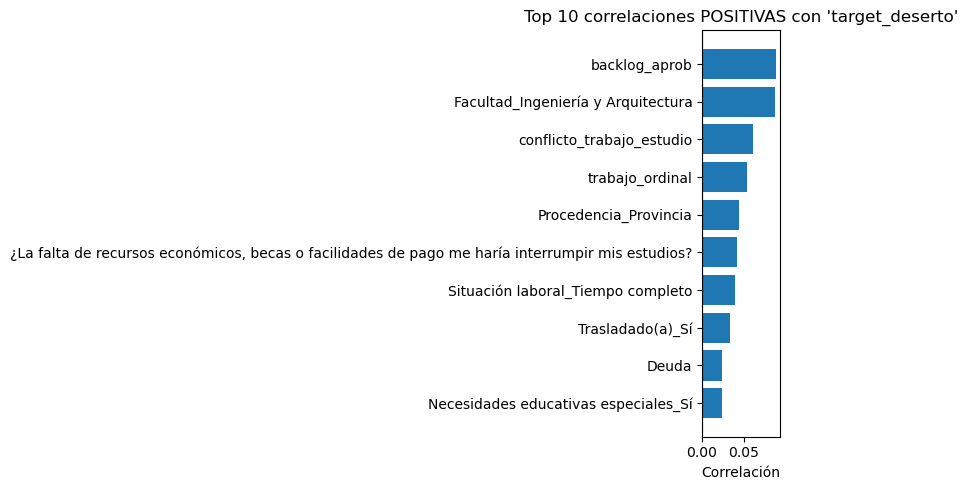

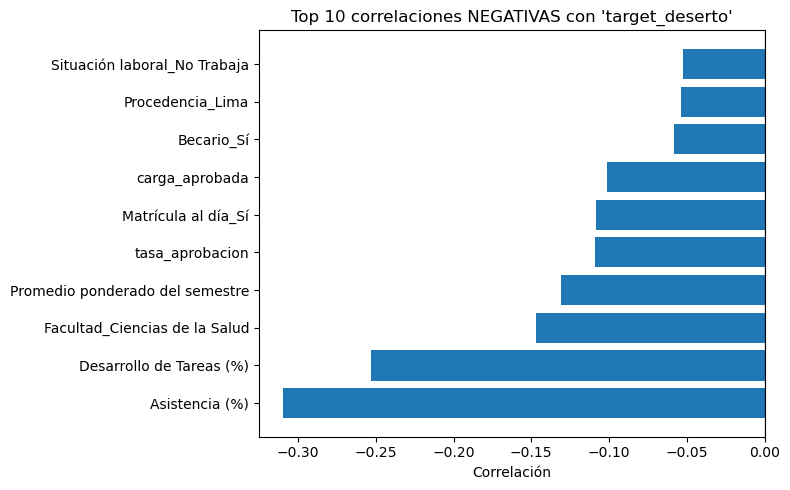

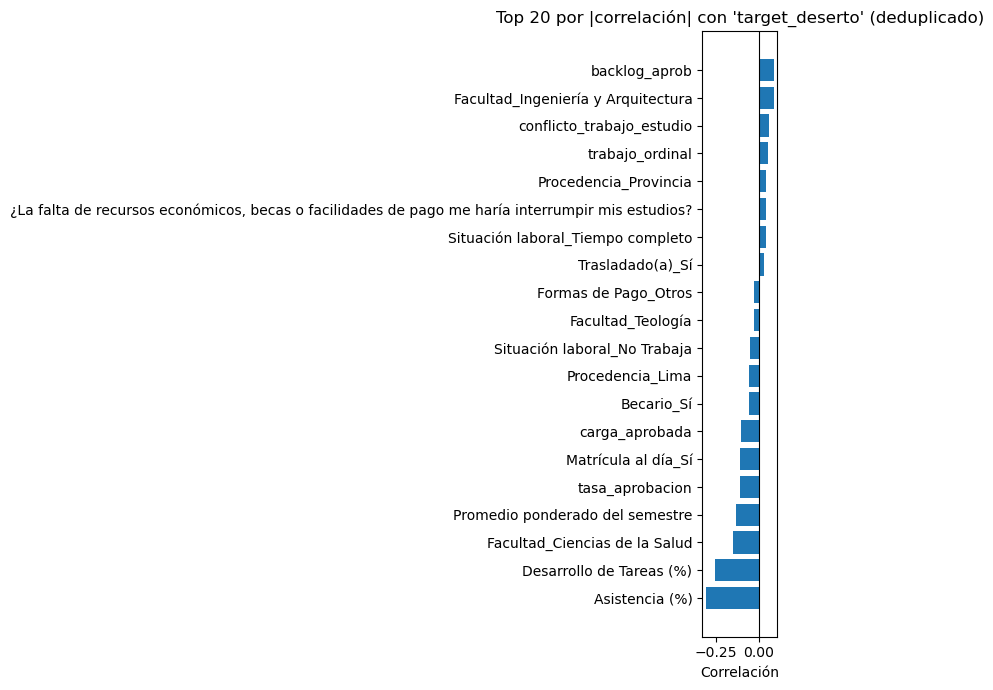

In [66]:
# Correlaciones
# --- 1) Serie ordenada (excluye el propio target) ---
corr_with_target = corr_vars['target_deserto'].drop(labels=['target_deserto']).dropna()
corr_with_target = corr_with_target.sort_values(ascending=False)

print("Correlaciones ordenadas con la variable objetivo:")
display(corr_with_target.to_frame("corr"))

# --- 2) Deduplicar pares *_scaled vs original (conserva el NO escalado si existe) ---
corr_df = corr_with_target.reset_index()
corr_df.columns = ["feature", "corr"]
corr_df["abs_corr"] = corr_df["corr"].abs()

# Regla: si hay 'var' y 'var_scaled', nos quedamos con 'var'
# Creamos una clave base removiendo el sufijo _scaled
corr_df["base_key"] = corr_df["feature"].str.replace(r"_scaled$", "", regex=True)

# Para cada base_key, si existen dos (scaled + no scaled), preferimos el no scaled
# Construimos un ranking: 0 si NO escalado, 1 si escalado
corr_df["is_scaled"] = corr_df["feature"].str.endswith("_scaled").astype(int)

# Nos quedamos con la fila de menor is_scaled (no scaled) para cada base_key;
# si sólo hay una, conserva la que haya.
corr_dedup = (
    corr_df.sort_values(["base_key", "is_scaled"])   # no scaled primero
           .drop_duplicates(subset=["base_key"], keep="first")
           .drop(columns=["is_scaled"])
)

# Orden final por correlación (puedes usar abs si prefieres)
corr_dedup_sorted = corr_dedup.sort_values("corr", ascending=False).reset_index(drop=True)

print("\nCorrelaciones (deduplicadas scaled/no-scaled), Top 25 por |corr|:")
topN = 25
display(corr_dedup_sorted.reindex(corr_dedup_sorted["abs_corr"].sort_values(ascending=False).index).head(topN))

# --- 3) Gráficos: Top-10 positivos y Top-10 negativos (deduplicados) ---
top_pos = corr_dedup_sorted.head(10).sort_values("corr")  # de menor a mayor para barh
top_neg = corr_dedup_sorted.tail(10).sort_values("corr")  # aquí ya son los más negativos

# --- Top 10 correlaciones POSITIVAS con 'target_deserto ---
plt.figure(figsize=(8,5))
plt.barh(top_pos["feature"], top_pos["corr"])
plt.title("Top 10 correlaciones POSITIVAS con 'target_deserto'")
plt.xlabel("Correlación")
plt.axvline(0, color="k", lw=0.8)
plt.tight_layout()
plt.show()

# --- Top 10 correlaciones NEGATIVAS con 'target_deserto ---
plt.figure(figsize=(8,5))
plt.barh(top_neg["feature"], top_neg["corr"])
plt.title("Top 10 correlaciones NEGATIVAS con 'target_deserto'")
plt.xlabel("Correlación")
plt.axvline(0, color="k", lw=0.8)
plt.tight_layout()
plt.show()

# --- Top 20 correlaciones con 'target_deserto ---
top_abs = corr_dedup_sorted.reindex(corr_dedup_sorted["abs_corr"].sort_values(ascending=False).index).head(20)
top_abs = top_abs.sort_values("corr")  # orden para barh
plt.figure(figsize=(8,7))
plt.barh(top_abs["feature"], top_abs["corr"])
plt.title("Top 20 por |correlación| con 'target_deserto' (deduplicado)")
plt.xlabel("Correlación")
plt.axvline(0, color="k", lw=0.8)
plt.tight_layout()
plt.show()

#### 📊 Interpretación de correlaciones

> Nota: son **correlaciones punto-biseriales** (Pearson con etiqueta 0/1). Valores **negativos** indican factores **protectores** (menor probabilidad de deserción); **positivos**, mayor riesgo. Las magnitudes suelen ser **pequeñas** en problemas con muchas variables y dummies; léanse como **señales** y no como efectos causales.

### Señales protectoras (correlación NEGATIVA)
- **Asistencia (%)** `r ≈ -0.31` → la mayor señal protectora.
- **Desarrollo de Tareas (%)** `r ≈ -0.25` → cumplimiento sostiene la permanencia.
- **Promedio ponderado** `r ≈ -0.13` y **tasa_aprobacion** `r ≈ -0.11` → mejor rendimiento, menor deserción.
- **Matrícula al día = Sí** `r ≈ -0.11` → regularidad de pagos protege.
- **Facultad = Ciencias de la Salud** `r ≈ -0.15` → perfil más persistente en esta escuela.
- **Becario = Sí** `r ≈ -0.06` → apoyo financiero asociado a continuidad.
- **Procedencia = Lima** `r ≈ -0.054` y **Situación laboral = No Trabaja** `r ≈ -0.053` → menor riesgo relativo.
- Señales menores adicionales: **Facultad = Teología** `r ≈ -0.028`, **Formas de pago = Otros** `r ≈ -0.026` (débiles).

### Señales de mayor riesgo (correlación POSITIVA)
- **backlog_aprob** (evaluadas no aprobadas) `r ≈ +0.089` → rezago académico ligado a deserción.
- **Facultad = Ingeniería y Arquitectura** `r ≈ +0.088` → mayor riesgo relativo en esta escuela.
- **conflicto_trabajo_estudio** `r ≈ +0.061` y **trabajo_ordinal** `r ≈ +0.054` → compatibilidad y carga laboral importan.
- **Procedencia = Provincia** `r ≈ +0.045` → posible efecto de distancia/adaptación/recursos.
- **Situación laboral = Tiempo completo** `r ≈ +0.040` → trabajar más horas eleva el riesgo.
- **Trasladado(a) = Sí** `r ≈ +0.034` y **NEE = Sí** `r ≈ +0.024` → señales de riesgo moderado.
- **Deuda** `r ≈ +0.024` → presión financiera contribuye.
- **Modo de solicitud = Ingreso directo** `r ≈ +0.023` (leve).
- **Likert (auto-percepción)**:  
  - “**Falta de recursos económicos** …” `r ≈ +0.042`  
  - “**Dificultad de cursos** …” `r ≈ +0.023`  
  - “**Calidad/metodologías** … desmotivan” `r ≈ +0.023`  
  → percepciones de **estrés académico/financiero** se alinean con mayor riesgo.

### Lecturas y acciones rápidas
- **Ejes críticos**: desempeño continuo (**Asistencia, Tareas, Promedio**) y **regularidad financiera** (Matrícula, Deuda/Beca).
- **Segmentación por Facultad**: refuerzo en **Ing./Arqu.**; Salud exhibe un perfil más persistente.
- **Trabajo–estudio**: priorizar **horarios flexibles**, tutorías y acompañamiento a **tiempo completo**.
- **Origen y transición**: estudiantes de **Provincia** y **Trasladados** requieren **acompañamiento de adaptación**.
- **Alertas tempranas**: umbrales en Asistencia (<80–85%), Tareas bajas, **backlog_aprob** alto, **Matrícula = No**, **conflicto_trabajo_estudio** alto.

> Técnica: con dummies (p. ej., `Facultad_X`), el signo depende de la **categoría base** (por `drop_first=True`). Usa estas correlaciones como **priorización** y complétalas con **importancia del modelo** (permutación/SHAP) tras entrenar.



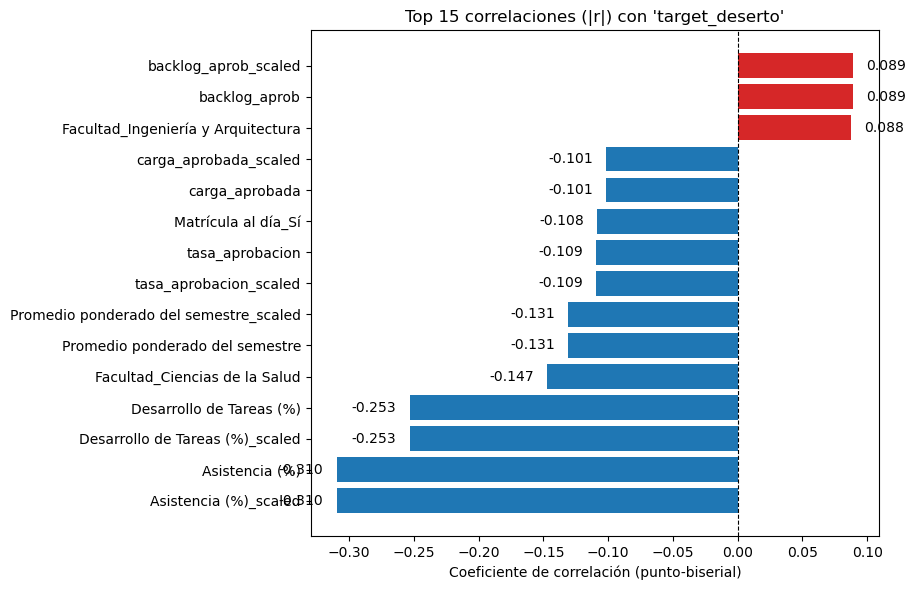

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usa la serie que tengas: corr_with_target (completa) o corr_dedup_sorted (deduplicada)
# --- Si usas corr_with_target (pd.Series) ---
series = corr_with_target.copy()

# Limpieza segura (por si intentas quitar algo que no está)
series = series.drop(labels=['target_deserto','Condición Final'], errors='ignore').dropna()

# Top N por valor absoluto (mezcla positivos y negativos)
topN = 15
top_abs_idx = series.abs().sort_values(ascending=False).head(topN).index
series_top = series.loc[top_abs_idx].sort_values()  # ordenado para barh

# Colores por signo
colors = np.where(series_top.values >= 0, '#d62728', '#1f77b4')  # rojo=riesgo, azul=protector

# Plot
plt.figure(figsize=(9,6))
plt.barh(series_top.index, series_top.values, color=colors)
plt.title(f"Top {topN} correlaciones (|r|) con 'target_deserto'")
plt.xlabel("Coeficiente de correlación (punto-biserial)")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()

# Anotar valores
for y, v in enumerate(series_top.values):
    plt.text(v + (0.01 if v >= 0 else -0.01), y, f"{v:.3f}",
             va='center', ha='left' if v >= 0 else 'right')

plt.show()


## Lectura del “Top 15 por |r|” con `target_deserto` (deserción=1)

> Correlaciones punto-biseriales con la etiqueta 0/1. Barras a la **izquierda (–)** = **protectoras**; a la **derecha (+)** = **mayor riesgo**. Magnitudes moderadas son normales en problemas multivariados.

### Factores protectores (negativos)
- **Asistencia (%) ~ −0.31** → Es la señal más fuerte: mayor asistencia se asocia claramente con **menor deserción**.
- **Desarrollo de Tareas (%) ~ −0.25** → Cumplimiento sostenido protege la continuidad.
- **Facultad = Ciencias de la Salud ~ −0.15** → Perfil más persistente en esta escuela.
- **Promedio ponderado ~ −0.13** y **tasa_aprobacion ~ −0.11** → Mejor rendimiento académico reduce el riesgo.
- **Matrícula al día = Sí ~ −0.11** → Regularidad de pagos se alinea con permanencia.
- **carga_aprobada ~ −0.10** → Progreso efectivo en lo matriculado protege.

### Factores de riesgo (positivos)
- **backlog_aprob ~ +0.09** → Mayor cantidad de cursos evaluados pero **no aprobados** se asocia con **mayor deserción** (señal de rezago).
- **Facultad = Ingeniería y Arquitectura ~ +0.09** → Mayor propensión relativa a desertar frente a otras facultades (comparado con la categoría base).

> Duplicados “_scaled” y no escalados aparecen juntos porque muestran la misma relación (el escalado no cambia el signo). Si prefieres, usa la versión **deduplicada** para reportes.

### Qué implica para acciones/hipótesis
- **Alertas tempranas**: monitorear **Asistencia** (<80–85%), **Tareas** bajas, **Matrícula=No**, y **backlog_aprob** creciente.
- **Apoyo académico focalizado**: refuerzos en **Ingeniería/Arquitectura**, tutorías y seguimiento para estudiantes con **tasa_aprobacion** baja.
- **Gestión financiera**: priorizar casos con **Matrícula atrasada** y trabajar planes de pago.
- **Seguimiento de progreso**: promover **carga_aprobada** sostenida (acompañamiento/recuperaciones).

> Recordatorio metodológico: el signo en dummies (p. ej., *Facultad_X*) depende de la **categoría base** del one-hot. Estas correlaciones sirven para **priorizar**; valida su importancia con el modelo (permutación/SHAP) en la etapa de modelado.


In [68]:
# fin del cuaderno ----*-----

In [70]:
data

,Formas de Pago,Matrícula al día,Becario,Situación laboral,Facultad,Orden de solicitud,Modo de solicitud,Procedencia,Vivienda,Necesidades educativas especiales,...,"¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?","¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?,"¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?","¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?",Condición Final
0,Armadas,Sí,No,No Trabaja,Teología,Segunda Opción,Ingreso directo,Provincia,Residencia,No,...,2,3,5,2,3,3,4,4,2,Graduado
1,Armadas,Sí,No,Tiempo completo,Ciencias de la Salud,Segunda Opción,Examen de admisión ordinario,Lima,Alquila cuarto,No,...,3,2,1,1,5,2,3,5,5,Graduado
2,Armadas,Sí,No,Tiempo completo,Ciencias Humanas y Educación,Primera Opción,Examen de admisión ordinario,Lima,Familiares,No,...,1,3,3,4,5,5,1,5,3,Graduado
3,Otros,Sí,Sí,Tiempo completo,Ciencias Empresariales,Primera Opción,Ingreso directo,Provincia,Familiares,No,...,3,1,2,2,4,3,1,4,1,Graduado
4,Armadas,No,No,No Trabaja,Ciencias Humanas y Educación,Primera Opción,Examen de admisión ordinario,Lima,Residencia,No,...,5,1,3,2,2,4,5,5,3,Graduado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Contado,Sí,No,Medio Tiempo,Ingeniería y Arquitectura,Segunda Opción,Examen de admisión ordinario,Provincia,Familiares,No,...,1,1,4,5,1,3,1,1,1,Graduado
4996,Otros,Sí,No,Tiempo completo,Ciencias Humanas y Educación,Segunda Opción,Examen de admisión ordinario,Lima,Familiares,No,...,1,1,3,1,1,2,4,2,3,Desertó
4997,Armadas,Sí,Sí,No Trabaja,Ingeniería y Arquitectura,Primera Opción,Ingreso directo,Lima,Familiares,Sí,...,5,1,2,4,1,1,2,5,2,Graduado
4998,Armadas,Sí,No,No Trabaja,Ciencias Empresariales,Primera Opción,Examen de admisión ordinario,Provincia,Residencia,No,...,5,1,2,1,4,2,2,3,5,Graduado


In [72]:
# Asegura target binaria a partir de "Condición Final"
if "target_deserto" not in data.columns:
    if data["Condición Final"].dtype == "O":
        data["target_deserto"] = data["Condición Final"].map({"Graduado":0, "Desertó":1})
    else:
        data["target_deserto"] = data["Condición Final"].map({1:0, 2:1})

# --- Función genérica para frecuencias + Pareto + tasa y lift ---
def tabla_categorica(df, col, target="target_deserto", ordenar_por="percentage", asc=False):
    tmp = df[[col, target]].copy()
    total = len(tmp)
    # Frecuencia %
    freqs = (tmp[col].value_counts(dropna=False) / total * 100).rename("percentage").to_frame()
    freqs.index = freqs.index.astype(str)

    # Pareto acumulado
    freqs = freqs.sort_values("percentage", ascending=False)
    freqs["cum_%"] = freqs["percentage"].cumsum()

    # Tasa de deserción por categoría
    tasa = tmp.groupby(col)[target].mean().rename("dropout_rate").to_frame()
    tasa.index = tasa.index.astype(str)

    # Mezcla
    out = freqs.join(tasa, how="left")

    # Lift vs tasa global
    tasa_global = tmp[target].mean()
    out["lift"] = out["dropout_rate"] / tasa_global

    # Orden final
    if ordenar_por in out.columns:
        out = out.sort_values(ordenar_por, ascending=asc)
    return out

# --- Variables categóricas sugeridas además de "Facultad" ---
cat_vars = [
    "Situación laboral", "Procedencia", "Modo de solicitud", "Vivienda",
    "Formas de Pago", "Matrícula al día", "Becario",
    "Trasladado(a)", "Necesidades educativas especiales",
    "Género", "Estado civil",
    "Titulación de la madre", "Titulación del padre",
    "Ocupación de la madre", "Ocupación del padre"
]
cat_vars = [c for c in cat_vars if c in data.columns]  # solo las presentes

# --- Ejemplo: tu tabla actual de Facultad (extendida) ---
tabla_facultad = tabla_categorica(data, "Facultad")
display(tabla_facultad.head(10))

# --- Generar tablas para el resto y mostrarlas (Top 10) ---
tablas_cat = {}
for c in cat_vars:
    tablas_cat[c] = tabla_categorica(data, c)
    print(f"\n== {c} ==")
    display(tablas_cat[c].head(10))


,percentage,cum_%,dropout_rate,lift
Facultad,,,,
Ciencias Empresariales,29.58,29.58,0.291413,1.103002
Ingeniería y Arquitectura,27.68,57.26,0.326590,1.236145
Ciencias de la Salud,20.34,77.60,0.135693,0.513600
Ciencias Humanas y Educación,18.62,96.22,0.281418,1.065170
Teología,3.78,100.00,0.201058,0.761008



== Situación laboral ==


,percentage,cum_%,dropout_rate,lift
Situación laboral,,,,
No Trabaja,56.58,56.58,0.243902,0.923174
Medio Tiempo,27.40,83.98,0.282482,1.069197
Tiempo completo,16.02,100.00,0.304619,1.152987



== Procedencia ==


,percentage,cum_%,dropout_rate,lift
Procedencia,,,,
Lima,54.58,54.58,0.242580,0.918167
Provincia,40.48,95.06,0.288043,1.090248
Extranjero,4.94,100.00,0.307692,1.164619



== Modo de solicitud ==


,percentage,cum_%,dropout_rate,lift
Modo de solicitud,,,,
Examen de admisión ordinario,60.16,60.16,0.255319,0.966386
Ingreso directo,20.02,80.18,0.284715,1.077651
Ingreso por convenio o beca especial,7.12,87.30,0.278090,1.052573
Ingreso por traslado externo,4.60,91.90,0.239130,0.905111
Ingreso por traslado interno,4.20,96.10,0.257143,0.973289
Ingreso por reingreso,3.90,100.00,0.307692,1.164619



== Vivienda ==


,percentage,cum_%,dropout_rate,lift
Vivienda,,,,
Familiares,49.42,49.42,0.261433,0.989525
Alquila cuarto,25.60,75.02,0.272656,1.032007
Residencia,24.98,100.00,0.261009,0.987921



== Formas de Pago ==


,percentage,cum_%,dropout_rate,lift
Formas de Pago,,,,
Armadas,55.92,55.92,0.268956,1.018000
Contado,34.30,90.22,0.266472,1.008601
Otros,9.78,100.00,0.229039,0.866915



== Matrícula al día ==


,percentage,cum_%,dropout_rate,lift
Matrícula al día,,,,
Sí,87.82,87.82,0.246413,0.932676
No,12.18,100.00,0.392447,1.485415



== Becario ==


,percentage,cum_%,dropout_rate,lift
Becario,,,,
No,86.78,86.78,0.274257,1.038065
Sí,13.22,100.00,0.198185,0.750131



== Trasladado(a) ==


,percentage,cum_%,dropout_rate,lift
Trasladado(a),,,,
No,89.88,89.88,0.259235,0.981206
Sí,10.12,100.00,0.308300,1.166920



== Necesidades educativas especiales ==


,percentage,cum_%,dropout_rate,lift
Necesidades educativas especiales,,,,
No,97.24,97.24,0.262443,0.993351
Sí,2.76,100.00,0.326087,1.234243



== Género ==


,percentage,cum_%,dropout_rate,lift
Género,,,,
M,55.0,55.0,0.261091,0.988232
H,45.0,100.0,0.268000,1.014383



== Estado civil ==


,percentage,cum_%,dropout_rate,lift
Estado civil,,,,
Soltero,95.04,95.04,0.262626,0.994043
Casado,4.96,100.00,0.294355,1.114136



== Titulación de la madre ==


,percentage,cum_%,dropout_rate,lift
Titulación de la madre,,,,
Secundaria,38.28,38.28,0.267503,1.012500
Técnica,25.36,63.64,0.273659,1.035804
Educación Superior,21.00,84.64,0.247619,0.937241
Primaria,11.78,96.42,0.263158,0.996056
Sin estudios,3.58,100.00,0.262570,0.993830



== Titulación del padre ==


,percentage,cum_%,dropout_rate,lift
Titulación del padre,,,,
Secundaria,34.00,34.00,0.264118,0.999688
Educación Superior,28.22,62.22,0.270730,1.024716
Técnica,22.76,84.98,0.266257,1.007784
Primaria,12.22,97.20,0.240589,0.910633
Sin estudios,2.80,100.00,0.285714,1.081432



== Ocupación de la madre ==


,percentage,cum_%,dropout_rate,lift
Ocupación de la madre,,,,
Ama de casa / labores del hogar,16.38,16.38,0.262515,0.993623
Servicios personales y domésticos,16.12,32.50,0.270471,1.023738
Comerciantes / vendedores,15.84,48.34,0.252525,0.955811
Profesionales y técnicos,13.32,61.66,0.256757,0.971827
Obreros / trabajadores manuales,12.16,73.82,0.243421,0.921351
Empleados administrativos / de oficina,9.80,83.62,0.269388,1.019636
Agricultores / ganaderos / pescadores,6.36,89.98,0.289308,1.095035
Desempleado / sin ocupación,4.94,94.92,0.283401,1.072675
Otros / no especificado,2.92,97.84,0.301370,1.140688



== Ocupación del padre ==


,percentage,cum_%,dropout_rate,lift
Ocupación del padre,,,,
Comerciantes / vendedores,20.86,20.86,0.250240,0.947160
Obreros / trabajadores manuales,20.86,41.72,0.276127,1.045142
Profesionales y técnicos,15.50,57.22,0.259355,0.981661
Desempleado / sin ocupación,9.44,66.66,0.247881,0.938234
Empleados administrativos / de oficina,9.26,75.92,0.285097,1.079096
Servicios personales y domésticos,8.42,84.34,0.242280,0.917034
Agricultores / ganaderos / pescadores,6.94,91.28,0.291066,1.101689
Otros / no especificado,3.84,95.12,0.307292,1.163102
Militares / policías / fuerzas del orden,2.90,98.02,0.255172,0.965830


In [73]:
# Guardar dataset limpio (sin transformaciones adicionales)
data.to_csv("upeu_data_clean.csv", index=False)
print("✅ Dataset limpio guardado como upeu_data_clean.csv")

# Guardar dataset ya transformado (One-Hot Encoding, escalado, etc.)
data_encoded.to_csv("upeu_data_encoded.csv", index=False)
print("✅ Dataset transformado guardado como upeu_data_encoded.csv")


✅ Dataset limpio guardado como upeu_data_clean.csv
✅ Dataset transformado guardado como upeu_data_encoded.csv


### ✅  6. Data validation (Sesión 4)

Aquí buscamos quedarnos con las variables más útiles, eliminando redundantes o irrelevantes, para que el modelo sea eficiente y evite ruido.

In [74]:
# Cargar dataset limpio
df = pd.read_csv("upeu_data_clean.csv")
print("Forma del dataset limpio:", df.shape)
df.head()


Forma del dataset limpio: (5000, 46)


,Formas de Pago,Matrícula al día,Becario,Situación laboral,Facultad,Orden de solicitud,Modo de solicitud,Procedencia,Vivienda,Necesidades educativas especiales,...,"¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?,"¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?","¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?",Condición Final,target_deserto
0,Armadas,Sí,No,No Trabaja,Teología,Segunda Opción,Ingreso directo,Provincia,Residencia,No,...,3,5,2,3,3,4,4,2,Graduado,0
1,Armadas,Sí,No,Tiempo completo,Ciencias de la Salud,Segunda Opción,Examen de admisión ordinario,Lima,Alquila cuarto,No,...,2,1,1,5,2,3,5,5,Graduado,0
2,Armadas,Sí,No,Tiempo completo,Ciencias Humanas y Educación,Primera Opción,Examen de admisión ordinario,Lima,Familiares,No,...,3,3,4,5,5,1,5,3,Graduado,0
3,Otros,Sí,Sí,Tiempo completo,Ciencias Empresariales,Primera Opción,Ingreso directo,Provincia,Familiares,No,...,1,2,2,4,3,1,4,1,Graduado,0
4,Armadas,No,No,No Trabaja,Ciencias Humanas y Educación,Primera Opción,Examen de admisión ordinario,Lima,Residencia,No,...,1,3,2,2,4,5,5,3,Graduado,0


In [75]:
# Cargar dataset transformado
df_encoded = pd.read_csv("upeu_data_encoded.csv")
print("Forma del dataset transformado:", df_encoded.shape)
df_encoded.head()


Forma del dataset transformado: (5000, 93)


,Promedio ponderado del semestre,Asistencia (%),Desarrollo de Tareas (%),tasa_aprobacion,tasa_evaluacion,carga_aprobada,backlog_eval,backlog_aprob,Deuda,deuda_neta,...,Desarrollo de Tareas (%)_scaled,Deuda_scaled,deuda_neta_scaled,tasa_aprobacion_scaled,tasa_evaluacion_scaled,carga_aprobada_scaled,backlog_eval_scaled,backlog_aprob_scaled,trabajo_ordinal_scaled,conflicto_trabajo_estudio_scaled
0,16.64,84.0,83.9,0.800000,1.000000,0.800000,0,1,2735.37,2343.24,...,0.337615,2.105735,2.030452,0.533333,0.00,1.066667,0.0,-0.5,0.0,0.0
1,13.76,80.5,69.6,0.800000,0.833333,0.666667,1,1,3833.77,3471.58,...,-0.711927,3.249295,3.132985,0.533333,-1.00,0.444444,1.0,-0.5,2.0,2.5
2,9.95,84.0,82.5,0.428571,0.875000,0.375000,1,4,1080.84,559.95,...,0.234862,0.383182,0.287950,-0.952381,-0.75,-0.916667,1.0,1.0,2.0,0.5
3,16.08,83.8,83.7,0.666667,0.750000,0.500000,1,1,779.52,192.28,...,0.322936,0.069474,-0.071311,0.000000,-1.50,-0.333333,1.0,-0.5,2.0,2.5
4,13.08,81.7,100.0,0.571429,0.875000,0.500000,1,3,560.90,-152.88,...,1.519266,-0.158135,-0.408576,-0.380952,-0.75,-0.333333,1.0,0.5,0.0,0.0


In [77]:
# Seleccionar columnas relevantes para mostrar
cols_show = ['target_deserto', 'Edad_scaled'] + \
            [col for col in data_encoded.columns if col.startswith('Facultad_') or 
                                                   col.startswith('Género_') or 
                                                   col.startswith('Modo de solicitud_') or
                                                   col.startswith('Estado civil_')]

data_encoded[cols_show].head()


,target_deserto,Edad_scaled,Facultad_Ciencias Humanas y Educación,Facultad_Ciencias de la Salud,Facultad_Ingeniería y Arquitectura,Facultad_Teología,Modo de solicitud_Ingreso directo,Modo de solicitud_Ingreso por convenio o beca especial,Modo de solicitud_Ingreso por reingreso,Modo de solicitud_Ingreso por traslado externo,Modo de solicitud_Ingreso por traslado interno,Género_M,Estado civil_Soltero
0,0,-0.4,False,False,False,True,True,False,False,False,False,True,True
1,0,1.2,False,True,False,False,False,False,False,False,False,False,True
2,0,0.6,True,False,False,False,False,False,False,False,False,False,True
3,0,-0.2,False,False,False,False,True,False,False,False,False,False,True
4,0,0.2,True,False,False,False,False,False,False,False,False,False,True


/tmp/ipykernel_44/3470081458.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors, orient="h")
/tmp/ipykernel_44/3470081458.py:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors, orient="h")


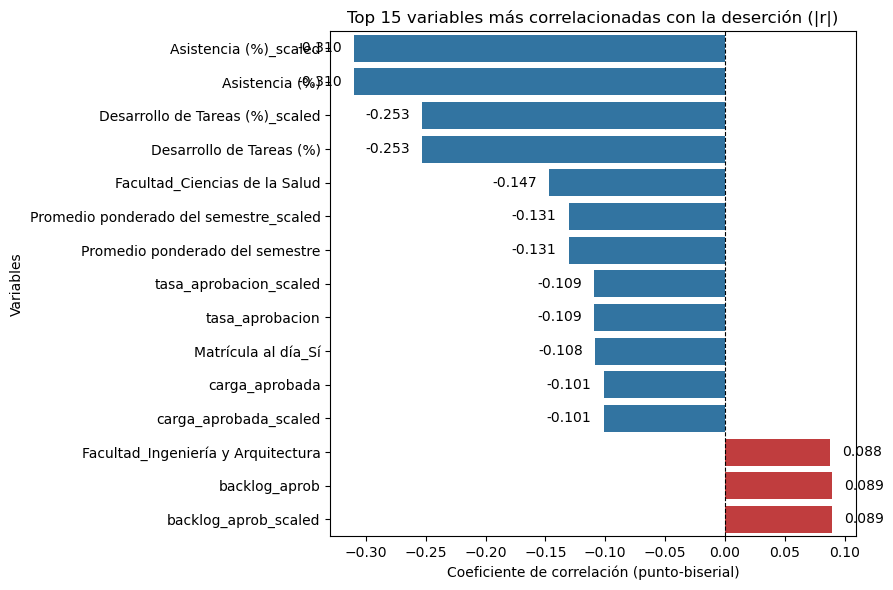

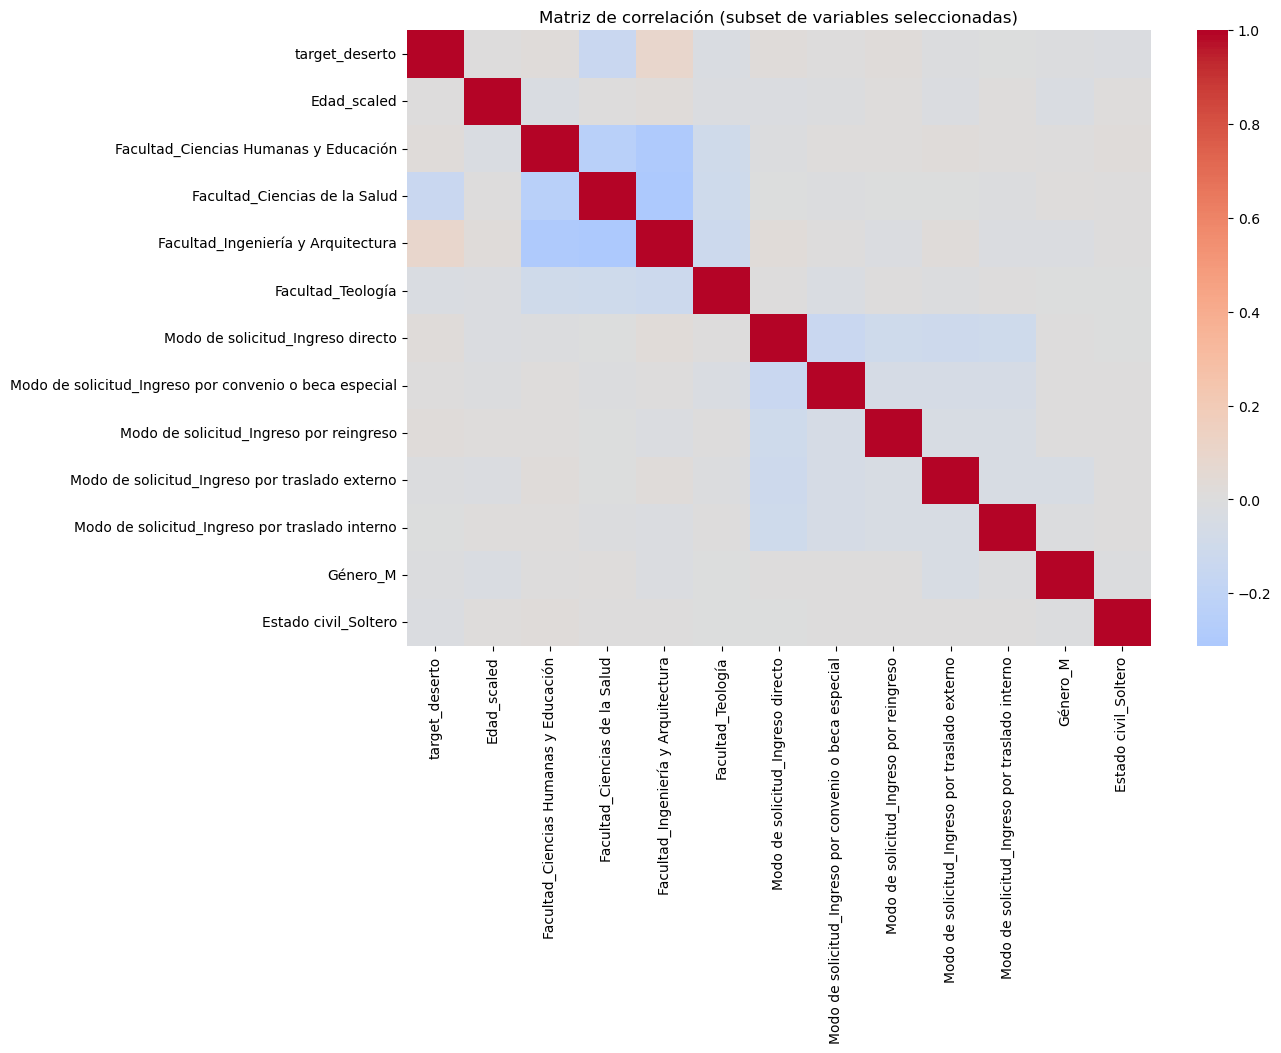

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlación solo en las columnas seleccionadas
#corr = data_encoded[cols_show].corr()

# --- 1) Si NO tienes cols_show definido para df_encoded, lo armamos rápido ---
if "cols_show" not in locals():
    prefixes = ("Facultad_", "Género_", "Modo de solicitud_", "Estado civil_")
    cols_show = []
    if "target_deserto" in df_encoded.columns:
        cols_show.append("target_deserto")
    if "Edad_scaled" in df_encoded.columns:
        cols_show.append("Edad_scaled")
    cols_show += [c for c in df_encoded.columns if c.startswith(prefixes)]

# --- 2) Correlación del target con TODAS las numéricas en df_encoded ---
assert "target_deserto" in df_encoded.columns, "Falta 'target_deserto' en df_encoded."

corr_vars = df_encoded.corr(numeric_only=True)
corr_target = (
    corr_vars["target_deserto"]
    .drop(labels=["target_deserto"], errors="ignore")
    .dropna()
    .sort_values(ascending=False)
)

# --- 3) Top-15 por |corr| (manteniendo signo) ---
topN = 15
top_idx = corr_target.abs().sort_values(ascending=False).head(topN).index
top_corr = corr_target.loc[top_idx].sort_values()  # ordenar para barh

plt.figure(figsize=(9,6))
colors = np.where(top_corr.values >= 0, "#d62728", "#1f77b4")  # rojo = mayor riesgo, azul = protector
sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors, orient="h")
plt.title(f"Top {topN} variables más correlacionadas con la deserción (|r|)")
plt.xlabel("Coeficiente de correlación (punto-biserial)")
plt.ylabel("Variables")
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
for y, v in enumerate(top_corr.values):
    plt.text(v + (0.01 if v >= 0 else -0.01), y, f"{v:.3f}",
             va="center", ha="left" if v >= 0 else "right")
plt.tight_layout()
plt.show()

# --- 4) (Opcional) Heatmap solo con tus columnas seleccionadas ---
cols_sel = [c for c in cols_show if c in df_encoded.columns]
if len(cols_sel) >= 2:
    corr_sel = df_encoded[cols_sel].corr(numeric_only=True)
    plt.figure(figsize=(12,8))
    sns.heatmap(corr_sel, annot=False, cmap="coolwarm", center=0)
    plt.title("Matriz de correlación (subset de variables seleccionadas)")
    plt.show()
else:
    print("Aviso: hay menos de 2 columnas válidas en cols_show para el heatmap.")



In [81]:
#Ordenar las correlaciones

# 1) Matriz de correlaciones (solo numéricas)
corr = df_encoded.corr(numeric_only=True)

# 2) Serie ordenada vs el target (excluye al propio target)
corr_target_sorted = (
    corr["target_deserto"]
    .drop(labels=["target_deserto"], errors="ignore")
    .sort_values(ascending=False)
)

print("Correlaciones con target_deserto (desc):")
display(corr_target_sorted)

# (Opcional) Top-N por |correlación|
topN = 20
corr_target_topabs = corr_target_sorted.reindex(
    corr_target_sorted.abs().sort_values(ascending=False).head(topN).index
)
print(f"\nTop {topN} por |correlación| con target_deserto:")
display(corr_target_topabs)


Correlaciones con target_deserto (desc):


backlog_aprob_scaled                  0.089241
backlog_aprob                         0.089241
Facultad_Ingeniería y Arquitectura    0.087543
conflicto_trabajo_estudio_scaled      0.060909
conflicto_trabajo_estudio             0.060909
                                        ...   
Facultad_Ciencias de la Salud        -0.147277
Desarrollo de Tareas (%)             -0.253281
Desarrollo de Tareas (%)_scaled      -0.253281
Asistencia (%)                       -0.309616
Asistencia (%)_scaled                -0.309616
Name: target_deserto, Length: 91, dtype: float64


Top 20 por |correlación| con target_deserto:


Asistencia (%)_scaled                    -0.309616
Asistencia (%)                           -0.309616
Desarrollo de Tareas (%)_scaled          -0.253281
Desarrollo de Tareas (%)                 -0.253281
Facultad_Ciencias de la Salud            -0.147277
Promedio ponderado del semestre_scaled   -0.130724
Promedio ponderado del semestre          -0.130724
tasa_aprobacion_scaled                   -0.109089
tasa_aprobacion                          -0.109089
Matrícula al día_Sí                      -0.108324
carga_aprobada                           -0.101456
carga_aprobada_scaled                    -0.101456
backlog_aprob_scaled                      0.089241
backlog_aprob                             0.089241
Facultad_Ingeniería y Arquitectura        0.087543
conflicto_trabajo_estudio                 0.060909
conflicto_trabajo_estudio_scaled          0.060909
Becario_Sí                               -0.058439
trabajo_ordinal_scaled                    0.054360
trabajo_ordinal                

#####  Selección final de variables

In [82]:
TARGET = "target_deserto"

# 1) Columnas candidatas: todas menos el target y la etiqueta original
candidates = [c for c in data_encoded.columns if c not in [TARGET, "Condición Final"]]

# 2) Correlación (absoluta) de cada feature con el target
corr_with_target = data_encoded[candidates + [TARGET]].corr()[TARGET].drop(TARGET).abs()

# --- Parámetros de selección ---
# Umbral mínimo de correlación con el target (ajústalo si lo deseas)
MIN_ABS_CORR = 0.02  # 0.02 ~ 2% de efecto lineal; antes de modelado suele ser un buen filtro inicial
# Número máximo de features por si prefieres top-k además del umbral (opcional)
TOP_K = None  # por ejemplo 30; déjalo en None para usar solo el umbral

# 3) Seleccionar por umbral (y opcionalmente por top-k)
selected_by_corr = corr_with_target[corr_with_target >= MIN_ABS_CORR].sort_values(ascending=False)
if TOP_K is not None and len(selected_by_corr) > TOP_K:
    selected_by_corr = selected_by_corr.head(TOP_K)

selected_features = selected_by_corr.index.tolist()

print("▶ Features seleccionadas por correlación (>= {:.3f}): {}"
      .format(MIN_ABS_CORR, len(selected_features)))
print(selected_by_corr)

# 4) (Opcional pero recomendado) eliminar colinealidad alta entre seleccionadas
#    Regla simple: si |corr| > 0.90, nos quedamos con la que tenga mayor correlación con el target.
if len(selected_features) > 1:
    corr_mat = data_encoded[selected_features].corr().abs()
    # Acabamos con una estrategia greedy
    to_drop_highcorr = set()
    # Ordenar por importancia (corr con target) para preservar las más útiles
    ordered = selected_by_corr.index.tolist()
    kept = []
    for feat in ordered:
        if feat in to_drop_highcorr:
            continue
        kept.append(feat)
        # Marcar para eliminar otras muy colineales con 'feat'
        highly_corr = corr_mat.index[(corr_mat[feat] > 0.90) & (corr_mat.index != feat)].tolist()
        for hc in highly_corr:
            to_drop_highcorr.add(hc)

    final_features = [f for f in kept if f not in to_drop_highcorr]
else:
    final_features = selected_features

print("\n❌ Eliminadas por colinealidad (>0.90):", sorted(list(set(selected_features) - set(final_features))))
print("✅ Features finales:", len(final_features))

# 5) Construir el dataset final para modelar
df_final = data_encoded[final_features + [TARGET]].copy()
print("Dimensiones finales:", df_final.shape)

# Vista rápida
df_final.head()

▶ Features seleccionadas por correlación (>= 0.020): 39
Asistencia (%)_scaled                                                                                                      0.309616
Asistencia (%)                                                                                                             0.309616
Desarrollo de Tareas (%)_scaled                                                                                            0.253281
Desarrollo de Tareas (%)                                                                                                   0.253281
Facultad_Ciencias de la Salud                                                                                              0.147277
Promedio ponderado del semestre                                                                                            0.130724
Promedio ponderado del semestre_scaled                                                                                     0.130724
tasa_aprobacion_scal

,Asistencia (%)_scaled,Desarrollo de Tareas (%)_scaled,Facultad_Ciencias de la Salud,Promedio ponderado del semestre,Matrícula al día_Sí,carga_aprobada,backlog_aprob_scaled,Facultad_Ingeniería y Arquitectura,conflicto_trabajo_estudio_scaled,Becario_Sí,...,Formas de Pago_Otros,Deuda,Necesidades educativas especiales_Sí,Modo de solicitud_Ingreso directo,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿La calidad de la enseñanza y las metodologías docentes me desmotivan al punto de pensar en abandonar?,"¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",Crianza Adventista_Sí,¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?,target_deserto
0,-0.060870,0.337615,False,16.64,True,0.800000,-0.5,False,0.0,False,...,False,2735.37,False,True,3,5,3,False,1,0
1,-0.365217,-0.711927,True,13.76,True,0.666667,-0.5,False,2.5,False,...,False,3833.77,False,False,2,3,2,True,5,0
2,-0.060870,0.234862,False,9.95,True,0.375000,1.0,False,0.5,False,...,False,1080.84,False,False,5,5,3,True,1,0
3,-0.078261,0.322936,False,16.08,True,0.500000,-0.5,False,2.5,True,...,True,779.52,False,True,3,1,1,True,5,0
4,-0.260870,1.519266,False,13.08,False,0.500000,0.5,False,0.0,False,...,False,560.90,False,False,4,1,1,True,1,0


## Resumen de selección por correlación + colinealidad

**Lo que quedó (≥ 0.02 |r|):**  
- **Desempeño/seguimiento:** Asistencia (%), Desarrollo de Tareas (%), Promedio, tasa_aprobacion, carga_aprobada, backlog_aprob.  
- **Finanzas/administrativo:** Matrícula al día (protector), Deuda/deuda_neta (riesgo moderado), Becario (protector).  
- **Trabajo:** trabajo_ordinal, conflicto_trabajo_estudio, Situación laboral (Tiempo completo ↑ riesgo).  
- **Contexto:** Facultad (Salud ↓ riesgo, Ing./Arq. ↑ riesgo), Procedencia (Lima ↓, Provincia ↑).  
- **Percepción (Likert):** recursos económicos, dificultad de cursos, calidad/metodologías, estrés (efectos pequeños pero consistentes).

**Por qué se eliminaron algunas:**  
- **Duplicadas** (versión `_scaled` vs. cruda) o **casi idénticas** (p. ej., tasa_aprobacion vs. carga_aprobada/backlog_aprob).  
- **Dummies complementarias** del mismo campo (p. ej., Procedencia_Lima vs. _Provincia) para evitar colinealidad > 0.90.  
- Se conserva la **más informativa** frente al target.

**Resultado:**  
- **25 variables finales** (df_final con 5000 × 26). Mantiene los ejes clave: **desempeño**, **finanzas**, **trabajo**, **facultad/procedencia** y **percepción**.

**Notas y próximos pasos:**  
- Para **predicción temprana**, considerar excluir tasas/backlogs (posible **fuga temporal**).  
- Validar con **importancia por permutación** o **SHAP** y ajustar umbrales (|r| 0.015–0.03; colinealidad 0.85–0.95).  
- Comparar un set “temprano” (sin progreso) vs. “completo” (con progreso).


In [83]:
df_final

,Asistencia (%)_scaled,Desarrollo de Tareas (%)_scaled,Facultad_Ciencias de la Salud,Promedio ponderado del semestre,Matrícula al día_Sí,carga_aprobada,backlog_aprob_scaled,Facultad_Ingeniería y Arquitectura,conflicto_trabajo_estudio_scaled,Becario_Sí,...,Formas de Pago_Otros,Deuda,Necesidades educativas especiales_Sí,Modo de solicitud_Ingreso directo,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿La calidad de la enseñanza y las metodologías docentes me desmotivan al punto de pensar en abandonar?,"¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",Crianza Adventista_Sí,¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?,target_deserto
0,-0.060870,0.337615,False,16.64,True,0.800000,-0.5,False,0.0,False,...,False,2735.37,False,True,3,5,3,False,1,0
1,-0.365217,-0.711927,True,13.76,True,0.666667,-0.5,False,2.5,False,...,False,3833.77,False,False,2,3,2,True,5,0
2,-0.060870,0.234862,False,9.95,True,0.375000,1.0,False,0.5,False,...,False,1080.84,False,False,5,5,3,True,1,0
3,-0.078261,0.322936,False,16.08,True,0.500000,-0.5,False,2.5,True,...,True,779.52,False,True,3,1,1,True,5,0
4,-0.260870,1.519266,False,13.08,False,0.500000,0.5,False,0.0,False,...,False,560.90,False,False,4,1,1,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.017391,0.433028,False,12.91,True,0.600000,0.0,True,0.5,False,...,False,511.76,False,False,3,2,1,True,2,0
4996,-0.286957,-0.014679,False,7.26,True,0.200000,0.5,False,1.5,False,...,True,1154.93,False,False,2,5,1,True,3,1
4997,-1.573913,0.212844,False,16.72,True,0.833333,-0.5,True,0.0,True,...,False,325.72,True,True,1,1,1,True,5,0
4998,-0.104348,-1.152294,False,13.69,True,0.750000,0.0,False,0.0,False,...,False,443.85,False,False,2,1,1,False,1,0


In [53]:
# Guardar dataset final listo para modelado
df_final.to_csv("upeu_data_encoded_final.csv", index=False)
print("✅ Dataset final guardado como upeu_data_encoded_final.csv")


✅ Dataset final guardado como upeu_data_encoded_final.csv


### Guía autónoma de la sesión 4

cada equipo aplica exactamente el mismo flujo a su dataset del proyecto grupal.

#### 📦 Entregables Sesión 4
1. Este notebook o cuaderno .ipynb pero con tus datos.
2. Dataset limpio + transformado en .csv.
3. Github:https://github.com/mindatos/respiralimpio (reemplaza aquí por tu url)
4. Coloca aquí el resumen de decisiones.
